In [1]:
import pandas as pd

# Load the dataset
file_path = 'diabetes_CDC.csv'
d_df = pd.read_csv(file_path)

# Display the first few rows of the dataset
print(d_df.head())
d_df.columns
d_df.shape[1]

   HighBP  HighChol  CholCheck  BMI  Smoker  Stroke  HeartDiseaseorAttack  \
0       1         1          1   40       1       0                     0   
1       0         0          0   25       1       0                     0   
2       1         1          1   28       0       0                     0   
3       1         0          1   27       0       0                     0   
4       1         1          1   24       0       0                     0   

   PhysActivity  Fruits  Veggies  ...  NoDocbcCost  GenHlth  MentHlth  \
0             0       0        1  ...            0        5        18   
1             1       0        0  ...            1        3         0   
2             0       1        0  ...            1        5        30   
3             1       1        1  ...            0        2         0   
4             1       1        1  ...            0        2         3   

   PhysHlth  DiffWalk  Sex  Age  Education  Income  target  
0        15         1    0    9      

22

In [2]:
# Check for missing values
missing_values_count = d_df.isnull().sum()
print("Missing values count:")
print(missing_values_count)

# Filter columns with missing values > 0
missing_columns = missing_values_count[missing_values_count > 0]

# Print columns with missing values > 0
if not missing_columns.empty:
    print("Columns with missing values:")
    print(missing_columns)
else:
    print("No missing values found in any column.")


Missing values count:
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
target                  0
dtype: int64
No missing values found in any column.


In [3]:
# Get the data types of all variables
variable_types = d_df.dtypes

# Print the data types
print("Data types of all variables:")
print(variable_types)

# Binary variables represented as integers (0 or 1) can be used as int type.
# Converting Catrgorical Variable types from int to category

# Convert ordinal variables to categorical factors
d_df['MentHlth'] = d_df['MentHlth'].astype('category')
d_df['PhysHlth'] = d_df['PhysHlth'].astype('category')
d_df['Education'] = d_df['Education'].astype('category')
d_df['Income'] = d_df['Income'].astype('category')
d_df['Age'] = d_df['Age'].astype('category')
# Replace values in 'GenHlth' column with their inverses
d_df['GenHlth'] = d_df['GenHlth'].replace({1: 5, 2: 4, 3: 3, 4: 2, 5: 1})

# Display the modified 'GenHlth' column
print(d_df['GenHlth'])

print(d_df['GenHlth'].head())
d_df['GenHlth'] = d_df['GenHlth'].astype('category')

# Display the first few rows of the dataset
print(d_df.head())



Data types of all variables:
HighBP                  int64
HighChol                int64
CholCheck               int64
BMI                     int64
Smoker                  int64
Stroke                  int64
HeartDiseaseorAttack    int64
PhysActivity            int64
Fruits                  int64
Veggies                 int64
HvyAlcoholConsump       int64
AnyHealthcare           int64
NoDocbcCost             int64
GenHlth                 int64
MentHlth                int64
PhysHlth                int64
DiffWalk                int64
Sex                     int64
Age                     int64
Education               int64
Income                  int64
target                  int64
dtype: object
0         1
1         3
2         1
3         4
4         4
         ..
253675    3
253676    2
253677    5
253678    3
253679    4
Name: GenHlth, Length: 253680, dtype: int64
0    1
1    3
2    1
3    4
4    4
Name: GenHlth, dtype: int64
   HighBP  HighChol  CholCheck  BMI  Smoker  Stroke  Heart

In [240]:
# Get the data types of all variables
variable_types = d_df.dtypes

# Print the data types
print("Data types of all variables:")
print(variable_types)
print(d_df['GenHlth'])


# Assuming d_df is your DataFrame and it contains the following columns
selected_columns = ['BMI', 'GenHlth', 'Age', 'Income', 'PhysHlth', 'MentHlth', 'Education', 'HighBP', 'target']

# Extract the relevant columns
selected_df = d_df[selected_columns]

# Save the DataFrame to a CSV file
selected_df.to_csv('selected_features.csv', index=False)



Data types of all variables:
HighBP                     int64
HighChol                   int64
CholCheck                  int64
BMI                        int64
Smoker                     int64
Stroke                     int64
HeartDiseaseorAttack       int64
PhysActivity               int64
Fruits                     int64
Veggies                    int64
HvyAlcoholConsump          int64
AnyHealthcare              int64
NoDocbcCost                int64
GenHlth                   object
MentHlth                category
PhysHlth                category
DiffWalk                   int64
Sex                        int64
Age                     category
Education               category
Income                  category
target                     int64
dtype: object
0         1
1         3
2         1
3         4
4         4
         ..
253675    3
253676    2
253677    5
253678    3
253679    4
Name: GenHlth, Length: 253680, dtype: object


In [5]:
# Get unique values of the target variable
unique_targets = d_df['target'].unique()

# Print the unique values
print("Unique values of the target variable:")
print(unique_targets)


Unique values of the target variable:
[0 1]


---CORRELATIONS---
                        HighBP  HighChol  CholCheck       BMI    Smoker  \
HighBP                1.000000  0.298199   0.098508  0.213748  0.096991   
HighChol              0.298199  1.000000   0.085642  0.106722  0.091299   
CholCheck             0.098508  0.085642   1.000000  0.034495 -0.009929   
BMI                   0.213748  0.106722   0.034495  1.000000  0.013804   
Smoker                0.096991  0.091299  -0.009929  0.013804  1.000000   
Stroke                0.129575  0.092620   0.024158  0.020153  0.061173   
HeartDiseaseorAttack  0.209361  0.180765   0.044206  0.052904  0.114441   
PhysActivity         -0.125267 -0.078046   0.004190 -0.147294 -0.087401   
Fruits               -0.040555 -0.040859   0.023849 -0.087518 -0.077666   
Veggies              -0.061266 -0.039874   0.006121 -0.062275 -0.030678   
HvyAlcoholConsump    -0.003972 -0.011543  -0.023730 -0.048736  0.101619   
AnyHealthcare         0.038425  0.042230   0.117626 -0.018471 -0.023251   
NoDocb

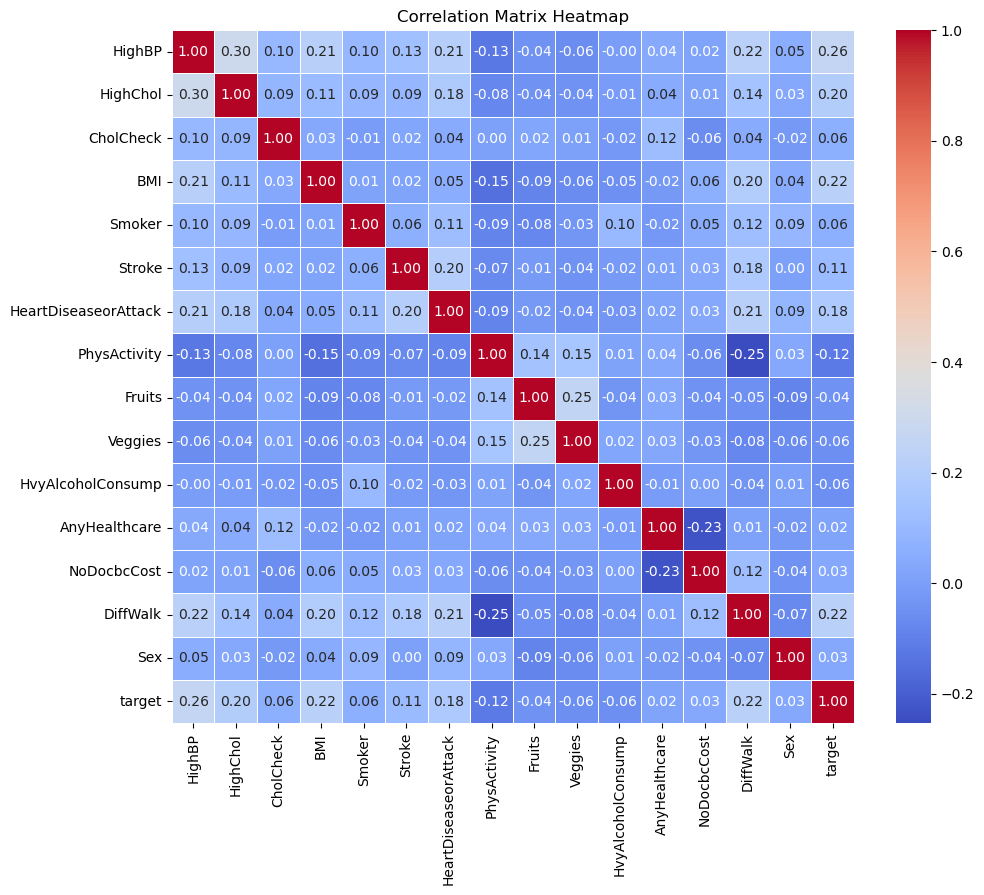

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Compute the correlation matrix
corr = d_df.corr(numeric_only=True)

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool_))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
x = sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

# Show Plot
print("---CORRELATIONS---")
print(corr)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [7]:
# Compute the correlation matrix
corr = d_df.corr(numeric_only=True)

# Get the correlation values with the target variable
target_corr = corr['target'].drop('target')

# Print the correlation values with the target variable
print("Correlation with target variable:")
print(target_corr)

Correlation with target variable:
HighBP                  0.263129
HighChol                0.200276
CholCheck               0.064761
BMI                     0.216843
Smoker                  0.060789
Stroke                  0.105816
HeartDiseaseorAttack    0.177282
PhysActivity           -0.118133
Fruits                 -0.040779
Veggies                -0.056584
HvyAlcoholConsump      -0.057056
AnyHealthcare           0.016255
NoDocbcCost             0.031433
DiffWalk                0.218344
Sex                     0.031430
Name: target, dtype: float64


In [8]:
from sklearn.feature_selection import VarianceThreshold

# Create a VarianceThreshold object with a threshold
selector = VarianceThreshold(threshold=0.1)

# Fit and transform the data to remove low variance features
X_high_variance = selector.fit_transform(d_df.drop(columns=['target']))

# Get the names of the selected features
selected_features = d_df.drop(columns=['target']).columns[selector.get_support()]


# Print the total number of features
total_features = len(d_df.drop(columns=['target']).columns)
print("Total features:", total_features)

# Print the count of selected features
selected_features_count = len(selected_features)
print("Number of selected features after applying low variance filter:", selected_features_count)

# Print the selected features
print("Selected features after applying low variance filter:")
print(selected_features)


Total features: 21
Number of selected features after applying low variance filter: 15
Selected features after applying low variance filter:
Index(['HighBP', 'HighChol', 'BMI', 'Smoker', 'PhysActivity', 'Fruits',
       'Veggies', 'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age',
       'Education', 'Income'],
      dtype='object')


In [9]:
from sklearn.feature_selection import VarianceThreshold

# Create a VarianceThreshold object with a threshold
selector = VarianceThreshold(threshold=0.5)

# Fit and transform the data to remove low variance features
X_high_variance = selector.fit_transform(d_df.drop(columns=['target']))

# Get the names of the selected features
selected_features = d_df.drop(columns=['target']).columns[selector.get_support()]


# Print the total number of features
total_features = len(d_df.drop(columns=['target']).columns)
print("Total features:", total_features)

# Print the count of selected features
selected_features_count = len(selected_features)
print("Number of selected features after applying low variance filter:", selected_features_count)

# Print the selected features
print("Selected features after applying low variance filter:")
print(selected_features)


Total features: 21
Number of selected features after applying low variance filter: 7
Selected features after applying low variance filter:
Index(['BMI', 'GenHlth', 'MentHlth', 'PhysHlth', 'Age', 'Education', 'Income'], dtype='object')


In [10]:
# Feature selection using SelectFromModel with RandomForestClassifier
# This method selects features based on their importance as determined by a Random Forest Classifier.

from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
#from sklearn.linear_model import LogisticRegression

# Define your dataset (features and target)
feat = d_df.drop(columns=['target'])
tar = d_df['target']

# Create a Logistic Regression model
clf = RandomForestClassifier(n_estimators=100, max_depth=None, min_samples_split=3, criterion='entropy', random_state=50)

#LogisticRegression(max_iter=1000, random_state=50)

# Create the SelectFromModel object
sel = SelectFromModel(estimator=clf, prefit=False, threshold='mean')

# Fit the SelectFromModel object to the dataset
sel.fit(feat, tar)

# Get the names of the selected features
selected_features = feat.columns[sel.get_support()]

# Print the selected features
print("Selected features using SelectFromModel with Random Forest Classifier:")
print("Total features:", len(feat.columns))
print("Number of selected features:", len(selected_features))
print(selected_features)

Selected features using SelectFromModel with Random Forest Classifier:
Total features: 21
Number of selected features: 8
Index(['HighBP', 'BMI', 'GenHlth', 'MentHlth', 'PhysHlth', 'Age', 'Education',
       'Income'],
      dtype='object')


In [11]:

# Assigning features based on the two feature selection methods
selected_features_rf = ['HighBP', 'BMI', 'GenHlth', 'MentHlth', 'PhysHlth', 'Age', 'Education', 'Income']
selected_features_lv = ['HighBP', 'HighChol', 'BMI', 'Smoker', 'PhysActivity', 'Fruits',
                        'Veggies', 'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age',
                        'Education', 'Income']


In [12]:
#Desciprtive Statistics
import pandas as pd

# Select the subset of data containing only the selected features
selected_features_data = d_df[selected_features_rf]
print(selected_features_data.dtypes)



HighBP          int64
BMI             int64
GenHlth      category
MentHlth     category
PhysHlth     category
Age          category
Education    category
Income       category
dtype: object


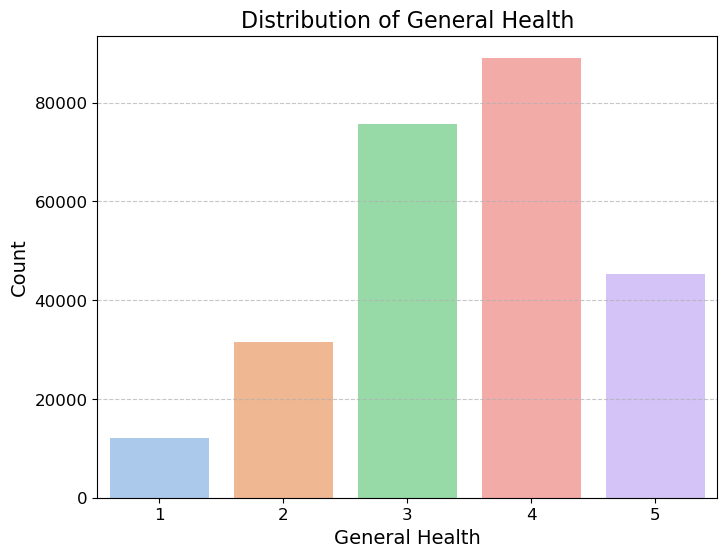

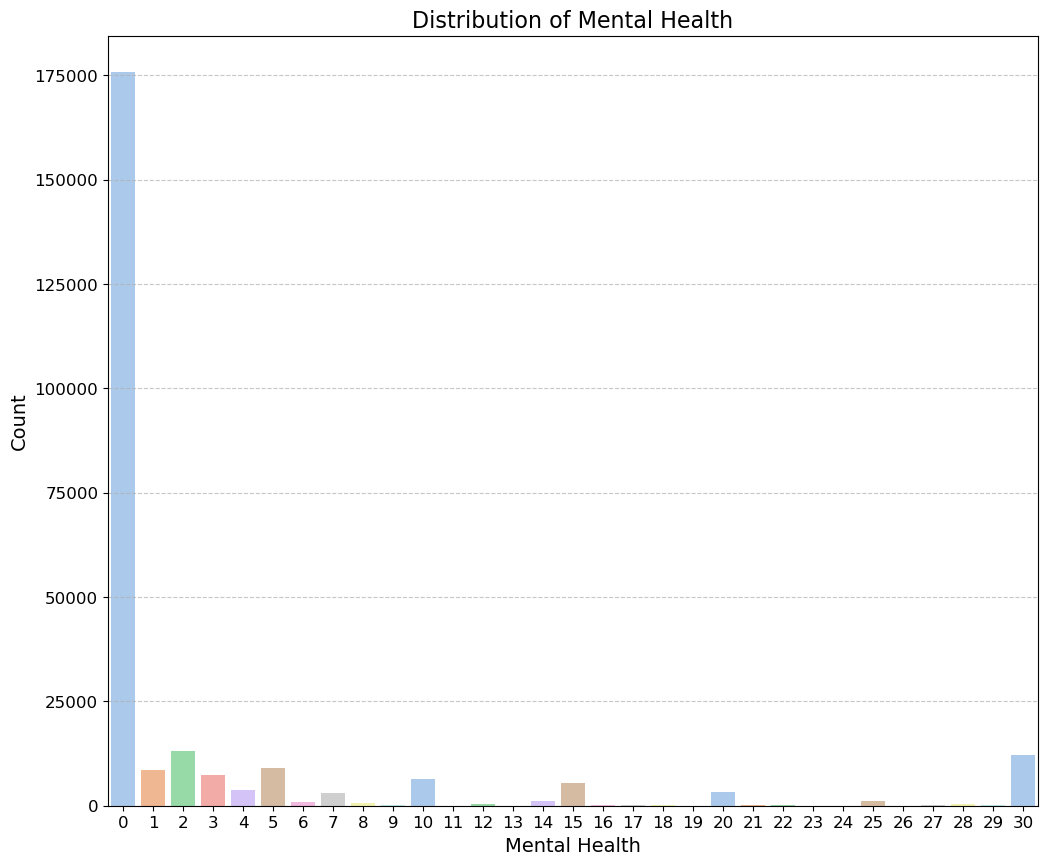

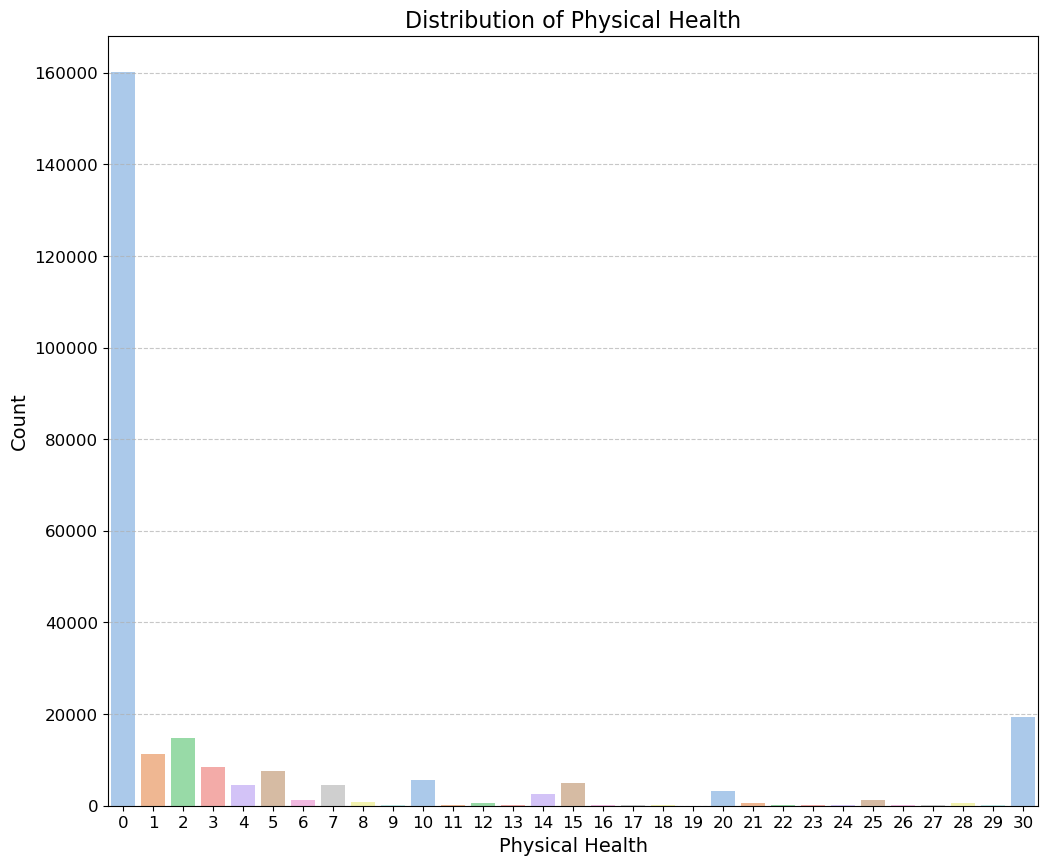

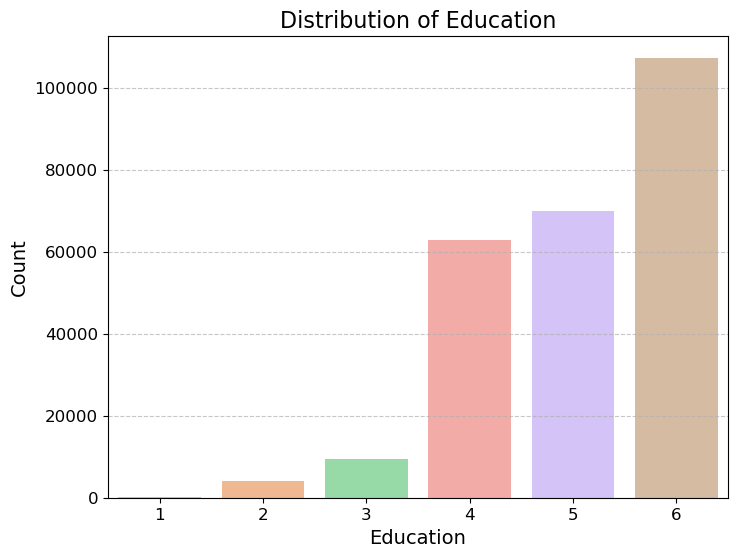

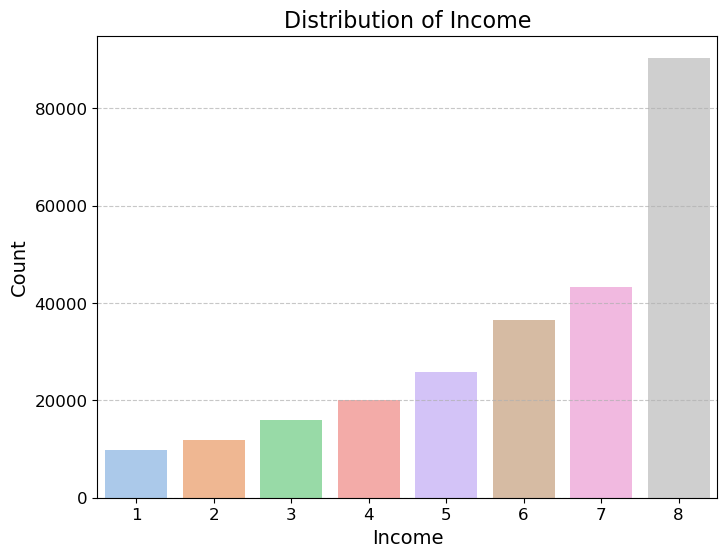

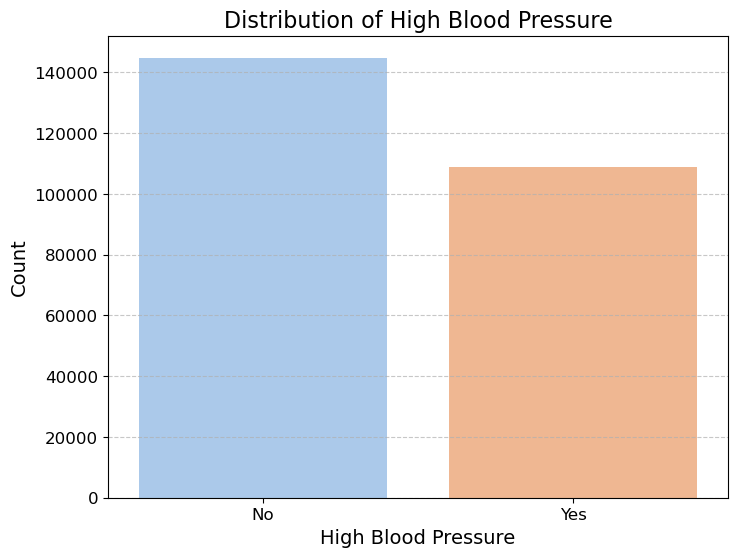

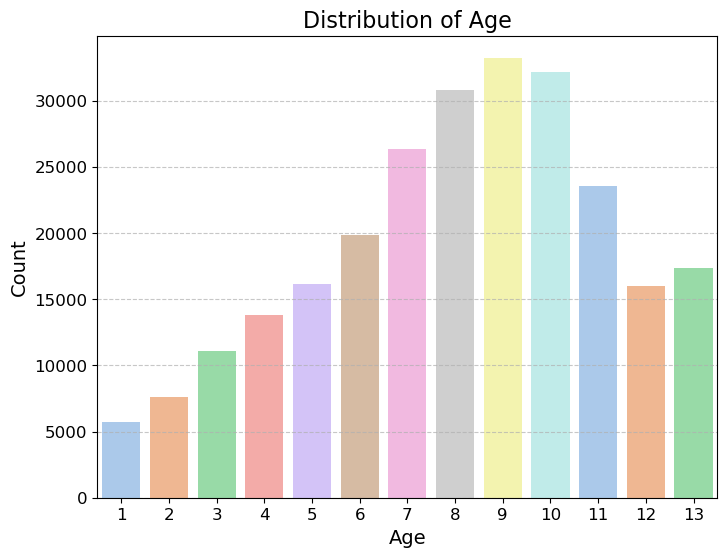

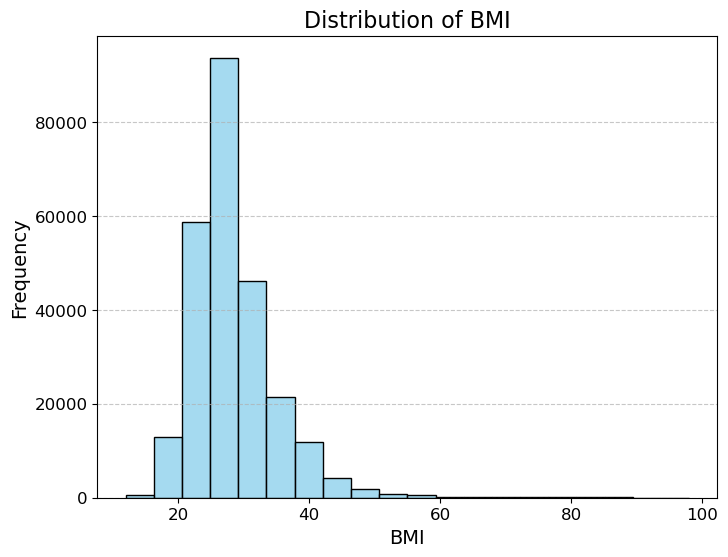

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot bar plot for 'GenHlth'
plt.figure(figsize=(8, 6))
sns.countplot(x='GenHlth', data=selected_features_data, palette='pastel')
plt.title('Distribution of General Health', fontsize=16)
plt.xlabel('General Health', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Plot bar plot for 'MentHlth'
plt.figure(figsize=(12, 10))
sns.countplot(x='MentHlth', data=selected_features_data, palette='pastel')
plt.title('Distribution of Mental Health', fontsize=16)
plt.xlabel('Mental Health', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Plot bar plot for 'PhysHlth'
plt.figure(figsize=(12, 10))
sns.countplot(x='PhysHlth', data=selected_features_data, palette='pastel')
plt.title('Distribution of Physical Health', fontsize=16)
plt.xlabel('Physical Health', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Plot bar plot for 'Education'
plt.figure(figsize=(8, 6))
sns.countplot(x='Education', data=selected_features_data, palette='pastel')
plt.title('Distribution of Education', fontsize=16)
plt.xlabel('Education', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Plot bar plot for 'Income'
plt.figure(figsize=(8, 6))
sns.countplot(x='Income', data=selected_features_data, palette='pastel')
plt.title('Distribution of Income', fontsize=16)
plt.xlabel('Income', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


# Plot bar plot for 'HighBP'
plt.figure(figsize=(8, 6))
sns.countplot(x='HighBP', data=selected_features_data, palette='pastel')
plt.title('Distribution of High Blood Pressure', fontsize=16)
plt.xlabel('High Blood Pressure', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks([0, 1], ['No', 'Yes'], fontsize=12)  # Replace 0 and 1 with labels
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


# Plot bar plot for 'Age'
plt.figure(figsize=(8, 6))
sns.countplot(x='Age', data=selected_features_data, palette='pastel')
plt.title('Distribution of Age', fontsize=16)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Plot histogram for 'BMI'
plt.figure(figsize=(8, 6))
sns.histplot(data=selected_features_data, x='BMI', bins=20, color='skyblue')
plt.title('Distribution of BMI', fontsize=16)
plt.xlabel('BMI', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [14]:
# Step 3: Split the Data Train and Test

from sklearn.model_selection import train_test_split
# all features

# Separate features and target
diabetes_X = d_df.drop(columns=['target'])
print(diabetes_X.columns)
diabetes_Y = d_df['target'] 
print(diabetes_Y.head())

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(diabetes_X, diabetes_Y, test_size=0.2, random_state=55)
# Display the shape of the training and testing sets
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

# selected_features_rf
# Separate features and target
rf_X = d_df[selected_features_rf]
print(rf_X.columns)
rf_Y = d_df['target'] 
print(rf_Y.head())

# Split the data into training and testing sets
X_train_rf, X_test_rf, Y_train_rf, Y_test_rf = train_test_split(rf_X, rf_Y, test_size=0.2, random_state=55)
# Display the shape of the training and testing sets
print(X_train_rf.shape, X_test_rf.shape, Y_train_rf.shape, Y_test_rf.shape)

# selected_features_lv
# Separate features and target
lv_X = d_df[selected_features_lv]
print(lv_X.columns)
lv_Y = d_df['target'] 
print(lv_Y.head())

# Split the data into training and testing sets
X_train_lv, X_test_lv, Y_train_lv, Y_test_lv = train_test_split(lv_X, lv_Y, test_size=0.2, random_state=55)
# Display the shape of the training and testing sets
print(X_train_lv.shape, X_test_lv.shape, Y_train_lv.shape, Y_test_lv.shape)



Index(['HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke',
       'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')
0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int64
(202944, 21) (50736, 21) (202944,) (50736,)
Index(['HighBP', 'BMI', 'GenHlth', 'MentHlth', 'PhysHlth', 'Age', 'Education',
       'Income'],
      dtype='object')
0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int64
(202944, 8) (50736, 8) (202944,) (50736,)
Index(['HighBP', 'HighChol', 'BMI', 'Smoker', 'PhysActivity', 'Fruits',
       'Veggies', 'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age',
       'Education', 'Income'],
      dtype='object')
0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int64
(202944, 15) (50736, 15) (202944,) (50736,)


In [27]:
# Modelling
# Logistic Regression on three sets of features

# all features

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix

# Initialize the logistic regression model
logreg_all = LogisticRegression(max_iter=10000)

# Train the model on the training data
logreg_all.fit(X_train, Y_train)

# Predict on the testing data
y_pred_logreg = logreg_all.predict(X_test)

# Classification Report
print("Classification Report:\n", classification_report(Y_test, y_pred_logreg))

# Overall Accuracy
overall_accuracy = accuracy_score(Y_test, y_pred_logreg)

# Overall Precision
overall_precision = precision_score(Y_test, y_pred_logreg, average='weighted')

# Overall Recall
overall_recall = recall_score(Y_test, y_pred_logreg, average='weighted')

# Overall F1-Score
overall_f1_score = f1_score(Y_test, y_pred_logreg, average='weighted')

# Print overall scores
print("Overall Accuracy:", overall_accuracy)
print("Overall Precision:", overall_precision)
print("Overall Recall:", overall_recall)
print("Overall F1-Score:", overall_f1_score)

# Compute confusion matrix
conf_matrix = confusion_matrix(Y_test, y_pred_logreg)

# Define index and columns labels
class_labels = ['Class 0', 'Class 1']  # Update with your actual class labels

# Create a DataFrame for the confusion matrix
confusion_df = pd.DataFrame(conf_matrix, index=class_labels, columns=class_labels)

# Print confusion matrix
print("Confusion Matrix:")
print(confusion_df)

#----------------------------------------------------------------------------------------------

# selected_features_rf

# Initialize the logistic regression model
logreg_rf = LogisticRegression(max_iter=10000)

# Train the model on the training data
logreg_rf.fit(X_train_rf, Y_train_rf)

# Predict on the testing data
y_pred_logreg_rf = logreg_rf.predict(X_test_rf)

# Classification Report
print("Classification Report for selected features using Random Forest:\n", classification_report(Y_test_rf, y_pred_logreg_rf))

# Overall Accuracy
overall_accuracy_rf = accuracy_score(Y_test_rf, y_pred_logreg_rf)

# Overall Precision
overall_precision_rf = precision_score(Y_test_rf, y_pred_logreg_rf, average='weighted')

# Overall Recall
overall_recall_rf = recall_score(Y_test_rf, y_pred_logreg_rf, average='weighted')

# Overall F1-Score
overall_f1_score_rf = f1_score(Y_test_rf, y_pred_logreg_rf, average='weighted')

# Print overall scores
print("Overall Accuracy for selected features using Random Forest:", overall_accuracy_rf)
print("Overall Precision for selected features using Random Forest:", overall_precision_rf)
print("Overall Recall for selected features using Random Forest:", overall_recall_rf)
print("Overall F1-Score for selected features using Random Forest:", overall_f1_score_rf)

# Compute confusion matrix
conf_matrix_rf = confusion_matrix(Y_test_rf, y_pred_logreg_rf)

# Define index and columns labels
class_labels = ['Class 0', 'Class 1']  # Update with your actual class labels

# Create a DataFrame for the confusion matrix
confusion_df_rf = pd.DataFrame(conf_matrix_rf, index=class_labels, columns=class_labels)

# Print confusion matrix
print("Confusion Matrix for selected features using Random Forest:")
print(confusion_df_rf)
#----------------------------------------------------------------------------------------------

# selected_features_lv

# Initialize the logistic regression model
logreg_lv = LogisticRegression(max_iter=10000)

# Train the model on the training data
logreg_lv.fit(X_train_lv, Y_train_lv)

# Predict on the testing data
y_pred_logreg_lv = logreg_lv.predict(X_test_lv)

# Classification Report
print("Classification Report for selected features using Low Variance:\n", classification_report(Y_test_lv, y_pred_logreg_lv))

# Overall Accuracy
overall_accuracy_lv = accuracy_score(Y_test_lv, y_pred_logreg_lv)

# Overall Precision
overall_precision_lv = precision_score(Y_test_lv, y_pred_logreg_lv, average='weighted')

# Overall Recall
overall_recall_lv = recall_score(Y_test_lv, y_pred_logreg_lv, average='weighted')

# Overall F1-Score
overall_f1_score_lv = f1_score(Y_test_lv, y_pred_logreg_lv, average='weighted')

# Print overall scores
print("Overall Accuracy for selected features using Low Variance:", overall_accuracy_lv)
print("Overall Precision for selected features using Low Variance:", overall_precision_lv)
print("Overall Recall for selected features using Low Variance:", overall_recall_lv)
print("Overall F1-Score for selected features using Low Variance:", overall_f1_score_lv)

# Compute confusion matrix
conf_matrix_lv = confusion_matrix(Y_test_lv, y_pred_logreg_lv)

# Define index and columns labels
class_labels = ['Class 0', 'Class 1']  # Update with your actual class labels

# Create a DataFrame for the confusion matrix
confusion_df_lv = pd.DataFrame(conf_matrix_lv, index=class_labels, columns=class_labels)

# Print confusion matrix
print("Confusion Matrix for selected features using Low Variance:")
print(confusion_df_lv)


Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.98      0.92     43646
           1       0.53      0.15      0.24      7090

    accuracy                           0.86     50736
   macro avg       0.71      0.56      0.58     50736
weighted avg       0.83      0.86      0.83     50736

Overall Accuracy: 0.8629375591296121
Overall Precision: 0.828617474703757
Overall Recall: 0.8629375591296121
Overall F1-Score: 0.8284273730685955
Confusion Matrix:
         Class 0  Class 1
Class 0    42710      936
Class 1     6018     1072
Classification Report for selected features using Random Forest:
               precision    recall  f1-score   support

           0       0.87      0.98      0.92     43646
           1       0.51      0.11      0.18      7090

    accuracy                           0.86     50736
   macro avg       0.69      0.55      0.55     50736
weighted avg       0.82      0.86      0.82     50736

Overall Accura

In [16]:
# Checking for class imbalance

# Calculate the proportion of each class in the target variable
class_counts = d_df['target'].value_counts()
class_proportions = class_counts / class_counts.sum()

# Print the class proportions
print("Class Proportions:")
print(class_proportions)
print(class_counts)

Class Proportions:
0    0.860667
1    0.139333
Name: target, dtype: float64
0    218334
1     35346
Name: target, dtype: int64


In [17]:
#!pip install --upgrade imbalanced-learn scikit-learn
#pip install -U scikit-learn imbalanced-learn


In [18]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split


In [19]:
#Resampling using SMOTE to avoid class imbalance
# Apply SMOTE to the training data only

# all features
smote = SMOTE(random_state=55)
X_train_resampled, Y_train_resampled = smote.fit_resample(X_train, Y_train)
print(X_train.shape, Y_train.shape, X_train_resampled.shape,Y_train_resampled.shape)

# Checking the Resampled Counts

import pandas as pd

# Assuming X_train_resampled and Y_train_resampled are NumPy arrays or pandas DataFrames/Series
# Convert them to pandas DataFrame/Series if they are not already

# Convert to DataFrame if they are numpy arrays
X_train_resampled_df = pd.DataFrame(X_train_resampled, columns=X_train.columns)
# Convert to Series if they are numpy arrays
Y_train_resampled_series = pd.Series(Y_train_resampled)

# Create a DataFrame with X_train_resampled and Y_train_resampled
resampled_df = pd.concat([X_train_resampled_df, Y_train_resampled_series], axis=1)

# Calculate the proportion of each class in the target variable for resampled data
resampled_class_counts = resampled_df['target'].value_counts()
resampled_class_proportions = resampled_class_counts / resampled_class_counts.sum()

# Print the class counts and proportions for resampled data
print("Resampled Class Counts:")
print(resampled_class_counts)
print("\nResampled Class Proportions:")
print(resampled_class_proportions)

# rf
# Apply SMOTE to the training data only
smote = SMOTE(random_state=55)
X_train_rf_resampled, Y_train_rf_resampled = smote.fit_resample(X_train_rf, Y_train_rf)
print(X_train_rf.shape, Y_train_rf.shape, X_train_rf_resampled.shape,Y_train_rf_resampled.shape)

#lv
# Apply SMOTE to the training data only
smote = SMOTE(random_state=55)
X_train_lv_resampled, Y_train_lv_resampled = smote.fit_resample(X_train_lv, Y_train_lv)
print(X_train_lv.shape, Y_train_lv.shape, X_train_lv_resampled.shape,Y_train_lv_resampled.shape)


(202944, 21) (202944,) (349376, 21) (349376,)
Resampled Class Counts:
0    174688
1    174688
Name: target, dtype: int64

Resampled Class Proportions:
0    0.5
1    0.5
Name: target, dtype: float64
(202944, 8) (202944,) (349376, 8) (349376,)
(202944, 15) (202944,) (349376, 15) (349376,)


In [20]:
# Logistic Regression on resampled data

# all features

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix

# Initialize the logistic regression model
logreg_all_resampled = LogisticRegression(max_iter=10000)

# Train the model on the resampled training data
logreg_all_resampled.fit(X_train_resampled, Y_train_resampled)

# Predict on the testing data
y_pred_logreg_resampled = logreg_all_resampled.predict(X_test)

# Classification Report
print("Classification Report for all features using resampled data:\n", classification_report(Y_test, y_pred_logreg_resampled))

# Overall Accuracy
overall_accuracy_resampled = accuracy_score(Y_test, y_pred_logreg_resampled)

# Overall Precision
overall_precision_resampled = precision_score(Y_test, y_pred_logreg_resampled, average='weighted')

# Overall Recall
overall_recall_resampled = recall_score(Y_test, y_pred_logreg_resampled, average='weighted')

# Overall F1-Score
overall_f1_score_resampled = f1_score(Y_test, y_pred_logreg_resampled, average='weighted')

# Print overall scores
print("Overall Accuracy for all features using resampled data:", overall_accuracy_resampled)
print("Overall Precision for all features using resampled data:", overall_precision_resampled)
print("Overall Recall for all features using resampled data:", overall_recall_resampled)
print("Overall F1-Score for all features using resampled data:", overall_f1_score_resampled)

# Compute confusion matrix
conf_matrix_resampled = confusion_matrix(Y_test, y_pred_logreg_resampled)

# Define index and columns labels
class_labels = ['Class 0', 'Class 1']  # Update with your actual class labels

# Create a DataFrame for the confusion matrix
confusion_df_resampled = pd.DataFrame(conf_matrix_resampled, index=class_labels, columns=class_labels)

# Print confusion matrix
print("Confusion Matrix for all features using resampled data:")
print(confusion_df_resampled)

#----------------------------------------------------------------------------------------------

# selected_features_rf

# Initialize the logistic regression model
logreg_rf_resampled = LogisticRegression(max_iter=10000)

# Train the model on the resampled training data with selected features
logreg_rf_resampled.fit(X_train_rf_resampled, Y_train_rf_resampled)

# Predict on the testing data with selected features
y_pred_logreg_rf_resampled = logreg_rf_resampled.predict(X_test_rf)

# Classification Report
print("Classification Report for selected features using Random Forest with resampled data:\n", classification_report(Y_test_rf, y_pred_logreg_rf_resampled))

# Overall Accuracy
overall_accuracy_rf_resampled = accuracy_score(Y_test_rf, y_pred_logreg_rf_resampled)

# Overall Precision
overall_precision_rf_resampled = precision_score(Y_test_rf, y_pred_logreg_rf_resampled, average='weighted')

# Overall Recall
overall_recall_rf_resampled = recall_score(Y_test_rf, y_pred_logreg_rf_resampled, average='weighted')

# Overall F1-Score
overall_f1_score_rf_resampled = f1_score(Y_test_rf, y_pred_logreg_rf_resampled, average='weighted')

# Print overall scores
print("Overall Accuracy for selected features using Random Forest with resampled data:", overall_accuracy_rf_resampled)
print("Overall Precision for selected features using Random Forest with resampled data:", overall_precision_rf_resampled)
print("Overall Recall for selected features using Random Forest with resampled data:", overall_recall_rf_resampled)
print("Overall F1-Score for selected features using Random Forest with resampled data:", overall_f1_score_rf_resampled)

# Compute confusion matrix
conf_matrix_rf_resampled = confusion_matrix(Y_test_rf, y_pred_logreg_rf_resampled)

# Create a DataFrame for the confusion matrix
confusion_df_rf_resampled = pd.DataFrame(conf_matrix_rf_resampled, index=class_labels, columns=class_labels)

# Print confusion matrix
print("Confusion Matrix for selected features using Random Forest with resampled data:")
print(confusion_df_rf_resampled)

#----------------------------------------------------------------------------------------------

# selected_features_lv

# Initialize the logistic regression model
logreg_lv_resampled = LogisticRegression(max_iter=10000)

# Train the model on the resampled training data with selected features
logreg_lv_resampled.fit(X_train_lv_resampled, Y_train_lv_resampled)

# Predict on the testing data with selected features
y_pred_logreg_lv_resampled = logreg_lv_resampled.predict(X_test_lv)

# Classification Report
print("Classification Report for selected features using Low Variance with resampled data:\n", classification_report(Y_test_lv, y_pred_logreg_lv_resampled))

# Overall Accuracy
overall_accuracy_lv_resampled = accuracy_score(Y_test_lv, y_pred_logreg_lv_resampled)

# Overall Precision
overall_precision_lv_resampled = precision_score(Y_test_lv, y_pred_logreg_lv_resampled, average='weighted')

# Overall Recall
overall_recall_lv_resampled = recall_score(Y_test_lv, y_pred_logreg_lv_resampled, average='weighted')

# Overall F1-Score
overall_f1_score_lv_resampled = f1_score(Y_test_lv, y_pred_logreg_lv_resampled, average='weighted')

# Print overall scores
print("Overall Accuracy for selected features using Low Variance with resampled data:", overall_accuracy_lv_resampled)
print("Overall Precision for selected features using Low Variance with resampled data:", overall_precision_lv_resampled)
print("Overall Recall for selected features using Low Variance with resampled data:", overall_recall_lv_resampled)
print("Overall F1-Score for selected features using Low Variance with resampled data:", overall_f1_score_lv_resampled)

# Compute confusion matrix
conf_matrix_lv_resampled = confusion_matrix(Y_test_lv, y_pred_logreg_lv_resampled)

# Create a DataFrame for the confusion matrix
confusion_df_lv_resampled = pd.DataFrame(conf_matrix_lv_resampled, index=class_labels, columns=class_labels)

# Print confusion matrix
print("Confusion Matrix for selected features using Low Variance with resampled data:")
print(confusion_df_lv_resampled)


Classification Report for all features using resampled data:
               precision    recall  f1-score   support

           0       0.93      0.76      0.84     43646
           1       0.31      0.66      0.42      7090

    accuracy                           0.74     50736
   macro avg       0.62      0.71      0.63     50736
weighted avg       0.84      0.74      0.78     50736

Overall Accuracy for all features using resampled data: 0.7431803847366761
Overall Precision for all features using resampled data: 0.843907833966807
Overall Recall for all features using resampled data: 0.7431803847366761
Overall F1-Score for all features using resampled data: 0.7768461232801708
Confusion Matrix for all features using resampled data:
         Class 0  Class 1
Class 0    33050    10596
Class 1     2434     4656
Classification Report for selected features using Random Forest with resampled data:
               precision    recall  f1-score   support

           0       0.94      0.73     

In [21]:
# Best model of the above three

# Comparing models based on evaluation metrics

# Create a dictionary to store evaluation metrics for each model
models_evaluation_resampled = {
    'all_features_resampled': {'accuracy': overall_accuracy_resampled, 'precision': overall_precision_resampled, 
                     'recall': overall_recall_resampled, 'f1_score': overall_f1_score_resampled},
    'selected_features_rf_resampled': {'accuracy': overall_accuracy_rf_resampled, 'precision': overall_precision_rf_resampled, 
                             'recall': overall_recall_rf_resampled, 'f1_score': overall_f1_score_rf_resampled},
    'selected_features_lv_resampled': {'accuracy': overall_accuracy_lv_resampled, 'precision': overall_precision_lv_resampled, 
                             'recall': overall_recall_lv_resampled, 'f1_score': overall_f1_score_lv_resampled}
}

# Print evaluation metrics for each model
for model, metrics in models_evaluation_resampled.items():
    print(f"\nEvaluation metrics for {model}:")
    print("Accuracy:", metrics['accuracy'])
    print("Precision:", metrics['precision'])
    print("Recall:", metrics['recall'])
    print("F1 Score:", metrics['f1_score'])

# Assign weights to evaluation metrics (you can adjust these weights based on your preference)
weights_resampled = {'accuracy': 1, 'precision': 1, 'recall': 1, 'f1_score': 1}

# Calculate weighted sums for each model
weighted_sums_resampled = {}
for model, metrics in models_evaluation_resampled.items():
    weighted_sum = sum(metrics[metric] * weights_resampled[metric] for metric in metrics)
    weighted_sums_resampled[model] = weighted_sum

# Rank the models based on their weighted sums (higher sum is better)
ranked_models_resampled = sorted(weighted_sums_resampled, key=weighted_sums_resampled.get, reverse=True)

# Print the ranked models
print("\nRanked models based on overall performance:")
for i, model in enumerate(ranked_models_resampled, start=1):
    print(f"{i}. {model} (Weighted Sum: {weighted_sums_resampled[model]})")



Evaluation metrics for all_features_resampled:
Accuracy: 0.7431803847366761
Precision: 0.843907833966807
Recall: 0.7431803847366761
F1 Score: 0.7768461232801708

Evaluation metrics for selected_features_rf_resampled:
Accuracy: 0.7330889309366131
Precision: 0.8540580080634114
Recall: 0.7330889309366131
F1 Score: 0.7705561963137234

Evaluation metrics for selected_features_lv_resampled:
Accuracy: 0.7377010406811731
Precision: 0.8469419048089186
Recall: 0.7377010406811731
F1 Score: 0.773193377902853

Ranked models based on overall performance:
1. all_features_resampled (Weighted Sum: 3.1071147267203303)
2. selected_features_lv_resampled (Weighted Sum: 3.0955373640741177)
3. selected_features_rf_resampled (Weighted Sum: 3.090792066250361)


In [22]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import pandas as pd

# Decision Tree on the Resampled Data

# Define index and columns labels
class_labels = ['Class 0', 'Class 1']  

#----------------------------------------------------------------------------------------------

# all features using resampled data

# Initialize the Decision Tree model
dt_all_resampled = DecisionTreeClassifier(random_state=55)

# Train the model on the resampled training data
dt_all_resampled.fit(X_train_resampled, Y_train_resampled)

# Predict on the testing data
Y_pred_all_resampled_dt = dt_all_resampled.predict(X_test)

# For all features using resampled data
accuracy_all_resampled_dt = accuracy_score(Y_test, Y_pred_all_resampled_dt)
precision_all_resampled_dt = precision_score(Y_test, Y_pred_all_resampled_dt, average='weighted')
recall_all_resampled_dt = recall_score(Y_test, Y_pred_all_resampled_dt, average='weighted')
f1_all_resampled_dt = f1_score(Y_test, Y_pred_all_resampled_dt, average='weighted')
confusion_matrix_all_resampled_dt = confusion_matrix(Y_test, Y_pred_all_resampled_dt)

print("For all features using resampled data (Decision Tree):")
print("Classification Report:")
print(classification_report(Y_test, Y_pred_all_resampled_dt))
print("Overall Accuracy:", accuracy_all_resampled_dt)
print("Overall Precision:", precision_all_resampled_dt)
print("Overall Recall:", recall_all_resampled_dt)
print("Overall F1-Score:", f1_all_resampled_dt)

# Create a DataFrame for the confusion matrix
confusion_df_all_resampled_dt = pd.DataFrame(confusion_matrix_all_resampled_dt, index=class_labels, columns=class_labels)

# Print confusion matrix
print("Confusion Matrix:")
print(confusion_df_all_resampled_dt)

#----------------------------------------------------------------------------------------------

# Selected features using Random Forest with resampled data

# Initialize the Decision Tree model
dt_rf_resampled = DecisionTreeClassifier(random_state=55)

# Train the model on the resampled training data with selected features
dt_rf_resampled.fit(X_train_rf_resampled, Y_train_rf_resampled)

# Predict on the testing data with selected features
Y_pred_rf_resampled_dt = dt_rf_resampled.predict(X_test_rf)

# For selected features using Random Forest with resampled data
accuracy_rf_resampled_dt = accuracy_score(Y_test_rf, Y_pred_rf_resampled_dt)
precision_rf_resampled_dt = precision_score(Y_test_rf, Y_pred_rf_resampled_dt, average='weighted')
recall_rf_resampled_dt = recall_score(Y_test_rf, Y_pred_rf_resampled_dt, average='weighted')
f1_rf_resampled_dt = f1_score(Y_test_rf, Y_pred_rf_resampled_dt, average='weighted')
confusion_matrix_rf_resampled_dt = confusion_matrix(Y_test_rf, Y_pred_rf_resampled_dt)

print("\nFor selected features using Random Forest with resampled data (Decision Tree):")
print("Classification Report:")
print(classification_report(Y_test_rf, Y_pred_rf_resampled_dt))
print("Overall Accuracy:", accuracy_rf_resampled_dt)
print("Overall Precision:", precision_rf_resampled_dt)
print("Overall Recall:", recall_rf_resampled_dt)
print("Overall F1-Score:", f1_rf_resampled_dt)

# Create a DataFrame for the confusion matrix
confusion_df_rf_resampled_dt = pd.DataFrame(confusion_matrix_rf_resampled_dt, index=class_labels, columns=class_labels)

# Print confusion matrix
print("Confusion Matrix:")
print(confusion_df_rf_resampled_dt)

#----------------------------------------------------------------------------------------------

# Selected features using low variance with resampled data

# Initialize the Decision Tree model
dt_lv_resampled = DecisionTreeClassifier(random_state=55)

# Train the model on the resampled training data with selected features
dt_lv_resampled.fit(X_train_lv_resampled, Y_train_lv_resampled)

# Predict on the testing data with selected features
Y_pred_lv_resampled_dt = dt_lv_resampled.predict(X_test_lv)

# For selected features using low variance with resampled data
accuracy_lv_resampled_dt = accuracy_score(Y_test_lv, Y_pred_lv_resampled_dt)
precision_lv_resampled_dt = precision_score(Y_test_lv, Y_pred_lv_resampled_dt, average='weighted')
recall_lv_resampled_dt = recall_score(Y_test_lv, Y_pred_lv_resampled_dt, average='weighted')
f1_lv_resampled_dt = f1_score(Y_test_lv, Y_pred_lv_resampled_dt, average='weighted')
confusion_matrix_lv_resampled_dt = confusion_matrix(Y_test_lv, Y_pred_lv_resampled_dt)

print("\nFor selected features using low variance with resampled data (Decision Tree):")
print("Classification Report:")
print(classification_report(Y_test_lv, Y_pred_lv_resampled_dt))
print("Overall Accuracy:", accuracy_lv_resampled_dt)
print("Overall Precision:", precision_lv_resampled_dt)
print("Overall Recall:", recall_lv_resampled_dt)
print("Overall F1-Score:", f1_lv_resampled_dt)

# Create a DataFrame for the confusion matrix
confusion_df_lv_resampled_dt = pd.DataFrame(confusion_matrix_lv_resampled_dt, index=class_labels, columns=class_labels)

# Print confusion matrix
print("Confusion Matrix:")
print(confusion_df_lv_resampled_dt)


For all features using resampled data (Decision Tree):
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.81      0.85     43646
           1       0.26      0.43      0.33      7090

    accuracy                           0.75     50736
   macro avg       0.58      0.62      0.59     50736
weighted avg       0.81      0.75      0.78     50736

Overall Accuracy: 0.7526017029328288
Overall Precision: 0.8080785760915146
Overall Recall: 0.7526017029328288
Overall F1-Score: 0.7754831306623395
Confusion Matrix:
         Class 0  Class 1
Class 0    35148     8498
Class 1     4054     3036

For selected features using Random Forest with resampled data (Decision Tree):
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.79      0.84     43646
           1       0.26      0.46      0.33      7090

    accuracy                           0.74     50736
   macro avg       0.58      0.

In [23]:
# Best model of the above three Decision Tree models

# Comparing models based on evaluation metrics

# Create a dictionary to store evaluation metrics for each model
models_evaluation_dt = {
    'all_features_dt': {'accuracy': accuracy_all_resampled_dt, 'precision': precision_all_resampled_dt, 
                        'recall': recall_all_resampled_dt, 'f1_score': f1_all_resampled_dt},
    'selected_features_rf_dt': {'accuracy': accuracy_rf_resampled_dt, 'precision': precision_rf_resampled_dt, 
                                'recall': recall_rf_resampled_dt, 'f1_score': f1_rf_resampled_dt},
    'selected_features_lv_dt': {'accuracy': accuracy_lv_resampled_dt, 'precision': precision_lv_resampled_dt, 
                                'recall': recall_lv_resampled_dt, 'f1_score': f1_lv_resampled_dt}
}

# Print evaluation metrics for each model
for model, metrics in models_evaluation_dt.items():
    print(f"\nEvaluation metrics for {model}:")
    print("Overall Accuracy:", metrics['accuracy'])
    print("Overall Precision:", metrics['precision'])
    print("Overall Recall:", metrics['recall'])
    print("Overall F1 Score:", metrics['f1_score'])

# Assign weights to evaluation metrics (you can adjust these weights based on your preference)
weights = {'accuracy': 1, 'precision': 1, 'recall': 1, 'f1_score': 1}

# Calculate weighted sums for each model
weighted_sums_dt = {}
for model, metrics in models_evaluation_dt.items():
    weighted_sum_dt = sum(metrics[metric] * weights[metric] for metric in metrics)
    weighted_sums_dt[model] = weighted_sum_dt

# Rank the models based on their weighted sums (higher sum is better)
ranked_models_dt = sorted(weighted_sums_dt, key=weighted_sums_dt.get, reverse=True)

# Print the ranked models
print("\nRanked models based on overall performance:")
for i, model in enumerate(ranked_models_dt, start=1):
    print(f"{i}. {model} (Weighted Sum: {weighted_sums_dt[model]})")



Evaluation metrics for all_features_dt:
Overall Accuracy: 0.7526017029328288
Overall Precision: 0.8080785760915146
Overall Recall: 0.7526017029328288
Overall F1 Score: 0.7754831306623395

Evaluation metrics for selected_features_rf_dt:
Overall Accuracy: 0.7444418164616841
Overall Precision: 0.8103263185882084
Overall Recall: 0.7444418164616841
Overall F1 Score: 0.7707658733854834

Evaluation metrics for selected_features_lv_dt:
Overall Accuracy: 0.7501379690949227
Overall Precision: 0.805822200610748
Overall Recall: 0.7501379690949227
Overall F1 Score: 0.7732085234239604

Ranked models based on overall performance:
1. all_features_dt (Weighted Sum: 3.0887651126195115)
2. selected_features_lv_dt (Weighted Sum: 3.0793066622245537)
3. selected_features_rf_dt (Weighted Sum: 3.06997582489706)


For all features using resampled data (Random Forest):
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.85      0.88     43646
           1       0.34      0.47      0.39      7090

    accuracy                           0.80     50736
   macro avg       0.62      0.66      0.63     50736
weighted avg       0.83      0.80      0.81     50736

Overall Accuracy: 0.7961013875748975
Overall Precision: 0.8274506804021354
Overall Recall: 0.7961013875748975
Overall F1-Score: 0.8094550419798834
Confusion Matrix:
         Class 0  Class 1
Class 0    37084     6562
Class 1     3783     3307

For selected features using Random Forest with resampled data (Random Forest):
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.80      0.85     43646
           1       0.29      0.51      0.37      7090

    accuracy                           0.76     50736
   macro avg       0.60      0.

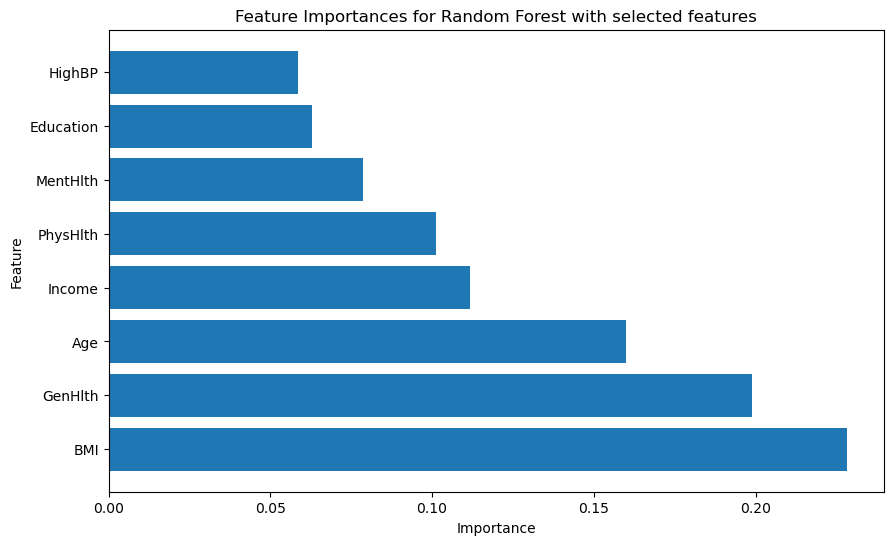

Confusion Matrix for Random Forest with selected features:
         Class 0  Class 1
Class 0    34820     8826
Class 1     3469     3621


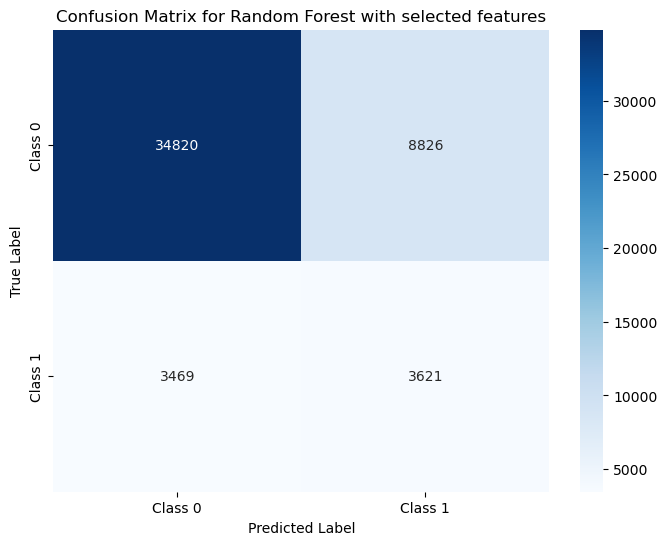


For selected features using low variance with resampled data (Random Forest):
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.84      0.87     43646
           1       0.33      0.47      0.39      7090

    accuracy                           0.79     50736
   macro avg       0.62      0.66      0.63     50736
weighted avg       0.83      0.79      0.81     50736

Overall Accuracy: 0.7920608640807316
Overall Precision: 0.8269755352161527
Overall Recall: 0.7920608640807316
Overall F1-Score: 0.8067525479850196
Confusion Matrix:
         Class 0  Class 1
Class 0    36839     6807
Class 1     3743     3347


In [24]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import pandas as pd

#----------------------------------------------------------------------------------------------

# All features using resampled data

# Initialize the Random Forest model
rfc_all_resampled = RandomForestClassifier(n_estimators=100, random_state=55)

# Train the model on the resampled training data
rfc_all_resampled.fit(X_train_resampled, Y_train_resampled)

# Predict on the testing data
Y_pred_all_resampled_rfc = rfc_all_resampled.predict(X_test)

# For all features using resampled data
accuracy_all_resampled_rfc = accuracy_score(Y_test, Y_pred_all_resampled_rfc)
precision_all_resampled_rfc = precision_score(Y_test, Y_pred_all_resampled_rfc, average='weighted')
recall_all_resampled_rfc = recall_score(Y_test, Y_pred_all_resampled_rfc, average='weighted')
f1_all_resampled_rfc = f1_score(Y_test, Y_pred_all_resampled_rfc, average='weighted')
confusion_matrix_all_resampled_rfc = confusion_matrix(Y_test, Y_pred_all_resampled_rfc)

print("For all features using resampled data (Random Forest):")
print("Classification Report:")
print(classification_report(Y_test, Y_pred_all_resampled_rfc))
print("Overall Accuracy:", accuracy_all_resampled_rfc)
print("Overall Precision:", precision_all_resampled_rfc)
print("Overall Recall:", recall_all_resampled_rfc)
print("Overall F1-Score:", f1_all_resampled_rfc)

# Create a DataFrame for the confusion matrix
confusion_df_all_resampled_rfc = pd.DataFrame(confusion_matrix_all_resampled_rfc, index=class_labels, columns=class_labels)

# Print confusion matrix
print("Confusion Matrix:")
print(confusion_df_all_resampled_rfc)

#----------------------------------------------------------------------------------------------

# Selected features using Random Forest with resampled data

# Initialize the Random Forest model
rfc_rf_resampled = RandomForestClassifier(n_estimators=100, random_state=55)

# Train the model on the resampled training data with selected features
rfc_rf_resampled.fit(X_train_rf_resampled, Y_train_rf_resampled)

# Predict on the testing data with selected features
Y_pred_rf_resampled_rfc = rfc_rf_resampled.predict(X_test_rf)

# For selected features using Random Forest with resampled data
accuracy_rf_resampled_rfc = accuracy_score(Y_test_rf, Y_pred_rf_resampled_rfc)
precision_rf_resampled_rfc = precision_score(Y_test_rf, Y_pred_rf_resampled_rfc, average='weighted')
recall_rf_resampled_rfc = recall_score(Y_test_rf, Y_pred_rf_resampled_rfc, average='weighted')
f1_rf_resampled_rfc = f1_score(Y_test_rf, Y_pred_rf_resampled_rfc, average='weighted')
confusion_matrix_rf_resampled_rfc = confusion_matrix(Y_test_rf, Y_pred_rf_resampled_rfc)

print("\nFor selected features using Random Forest with resampled data (Random Forest):")
print("Classification Report:")
print(classification_report(Y_test_rf, Y_pred_rf_resampled_rfc))
print("Overall Accuracy:", accuracy_rf_resampled_rfc)
print("Overall Precision:", precision_rf_resampled_rfc)
print("Overall Recall:", recall_rf_resampled_rfc)
print("Overall F1-Score:", f1_rf_resampled_rfc)

# Create a DataFrame for the confusion matrix
confusion_df_rf_resampled_rfc = pd.DataFrame(confusion_matrix_rf_resampled_rfc, index=class_labels, columns=class_labels)

# Print confusion matrix
print("Confusion Matrix:")
print(confusion_df_rf_resampled_rfc)


print("\nFor selected features using Random Forest with resampled data (Random Forest):")
print("Classification Report:")
print(classification_report(Y_test_rf, Y_pred_rf_resampled_rfc))
print("Overall Accuracy:", accuracy_rf_resampled_rfc)
print("Overall Precision:", precision_rf_resampled_rfc)
print("Overall Recall:", recall_rf_resampled_rfc)
print("Overall F1-Score:", f1_rf_resampled_rfc)


# Create a DataFrame for the confusion matrix
confusion_df_rf_resampled_rfc = pd.DataFrame(confusion_matrix_rf_resampled_rfc, index=class_labels, columns=class_labels)

# Print confusion matrix
print("Confusion Matrix for Random Forest with selected features:")
print(confusion_df_rf_resampled_rfc)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix_rf_resampled_rfc, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Random Forest with selected features')
plt.show()

# Extract feature importances
feature_importances_rf = rfc_rf_resampled.feature_importances_

# Create a DataFrame to display feature importances
feature_importance_df_rf = pd.DataFrame({'Feature': X_train_rf_resampled.columns, 'Importance': feature_importances_rf})
feature_importance_df_rf = feature_importance_df_rf.sort_values(by='Importance', ascending=False)

print("Feature Importance for Random Forest with selected features:")
print(feature_importance_df_rf)

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df_rf['Feature'], feature_importance_df_rf['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances for Random Forest with selected features')
plt.show()

# Create a DataFrame for the confusion matrix
confusion_df_rf_resampled_rfc = pd.DataFrame(confusion_matrix_rf_resampled_rfc, index=class_labels, columns=class_labels)

# Print confusion matrix
print("Confusion Matrix for Random Forest with selected features:")
print(confusion_df_rf_resampled_rfc)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix_rf_resampled_rfc, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Random Forest with selected features')
plt.show()

#----------------------------------------------------------------------------------------------

# Selected features using low variance with resampled data

# Initialize the Random Forest model
rfc_lv_resampled = RandomForestClassifier(n_estimators=100, random_state=55)

# Train the model on the resampled training data with selected features
rfc_lv_resampled.fit(X_train_lv_resampled, Y_train_lv_resampled)

# Predict on the testing data with selected features
Y_pred_lv_resampled_rfc = rfc_lv_resampled.predict(X_test_lv)

# For selected features using low variance with resampled data
accuracy_lv_resampled_rfc = accuracy_score(Y_test_lv, Y_pred_lv_resampled_rfc)
precision_lv_resampled_rfc = precision_score(Y_test_lv, Y_pred_lv_resampled_rfc, average='weighted')
recall_lv_resampled_rfc = recall_score(Y_test_lv, Y_pred_lv_resampled_rfc, average='weighted')
f1_lv_resampled_rfc = f1_score(Y_test_lv, Y_pred_lv_resampled_rfc, average='weighted')
confusion_matrix_lv_resampled_rfc = confusion_matrix(Y_test_lv, Y_pred_lv_resampled_rfc)

print("\nFor selected features using low variance with resampled data (Random Forest):")
print("Classification Report:")
print(classification_report(Y_test_lv, Y_pred_lv_resampled_rfc))
print("Overall Accuracy:", accuracy_lv_resampled_rfc)
print("Overall Precision:", precision_lv_resampled_rfc)
print("Overall Recall:", recall_lv_resampled_rfc)
print("Overall F1-Score:", f1_lv_resampled_rfc)

# Create a DataFrame for the confusion matrix
confusion_df_lv_resampled_rfc = pd.DataFrame(confusion_matrix_lv_resampled_rfc, index=class_labels, columns=class_labels)

# Print confusion matrix
print("Confusion Matrix:")
print(confusion_df_lv_resampled_rfc)


In [25]:
# Best model of the above three Random Forest models

# Comparing models based on evaluation metrics

# Create a dictionary to store evaluation metrics for each model
models_evaluation_rfc = {
    'all_features_rfc': {'accuracy': accuracy_all_resampled_rfc, 'precision': precision_all_resampled_rfc, 
                         'recall': recall_all_resampled_rfc, 'f1_score': f1_all_resampled_rfc},
    'selected_features_rf_rfc': {'accuracy': accuracy_rf_resampled_rfc, 'precision': precision_rf_resampled_rfc, 
                                 'recall': recall_rf_resampled_rfc, 'f1_score': f1_rf_resampled_rfc},
    'selected_features_lv_rfc': {'accuracy': accuracy_lv_resampled_rfc, 'precision': precision_lv_resampled_rfc, 
                                 'recall': recall_lv_resampled_rfc, 'f1_score': f1_lv_resampled_rfc}
}

# Print evaluation metrics for each model
for model, metrics in models_evaluation_rfc.items():
    print(f"\nEvaluation metrics for {model}:")
    print("Accuracy:", metrics['accuracy'])
    print("Precision:", metrics['precision'])
    print("Recall:", metrics['recall'])
    print("F1 Score:", metrics['f1_score'])

# Assign weights to evaluation metrics (you can adjust these weights based on your preference)
weights = {'accuracy': 1, 'precision': 1, 'recall': 1, 'f1_score': 1}

# Calculate weighted sums for each model
weighted_sums_rfc = {}
for model, metrics in models_evaluation_rfc.items():
    weighted_sum_rfc = sum(metrics[metric] * weights[metric] for metric in metrics)
    weighted_sums_rfc[model] = weighted_sum_rfc

# Rank the models based on their weighted sums (higher sum is better)
ranked_models_rfc = sorted(weighted_sums_rfc, key=weighted_sums_rfc.get, reverse=True)

# Print the ranked models
print("\nRanked models based on overall performance:")
for i, model in enumerate(ranked_models_rfc, start=1):
    print(f"{i}. {model} (Weighted Sum: {weighted_sums_rfc[model]})")



Evaluation metrics for all_features_rfc:
Accuracy: 0.7961013875748975
Precision: 0.8274506804021354
Recall: 0.7961013875748975
F1 Score: 0.8094550419798834

Evaluation metrics for selected_features_rf_rfc:
Accuracy: 0.7576671397035636
Precision: 0.8229704746523926
Recall: 0.7576671397035636
F1 Score: 0.7829686994316616

Evaluation metrics for selected_features_lv_rfc:
Accuracy: 0.7920608640807316
Precision: 0.8269755352161527
Recall: 0.7920608640807316
F1 Score: 0.8067525479850196

Ranked models based on overall performance:
1. all_features_rfc (Weighted Sum: 3.229108497531814)
2. selected_features_lv_rfc (Weighted Sum: 3.2178498113626355)
3. selected_features_rf_rfc (Weighted Sum: 3.121273453491181)



For selected features using Random Forest with resampled data (Random Forest):
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.80      0.85     43646
           1       0.29      0.51      0.37      7090

    accuracy                           0.76     50736
   macro avg       0.60      0.65      0.61     50736
weighted avg       0.82      0.76      0.78     50736

Overall Accuracy: 0.7576671397035636
Overall Precision: 0.8229704746523926
Overall Recall: 0.7576671397035636
Overall F1-Score: 0.7829686994316616
Feature Importance for Random Forest with selected features:
     Feature  Importance
1        BMI    0.228096
2    GenHlth    0.198901
5        Age    0.159836
7     Income    0.111624
4   PhysHlth    0.101331
3   MentHlth    0.078566
6  Education    0.062965
0     HighBP    0.058681


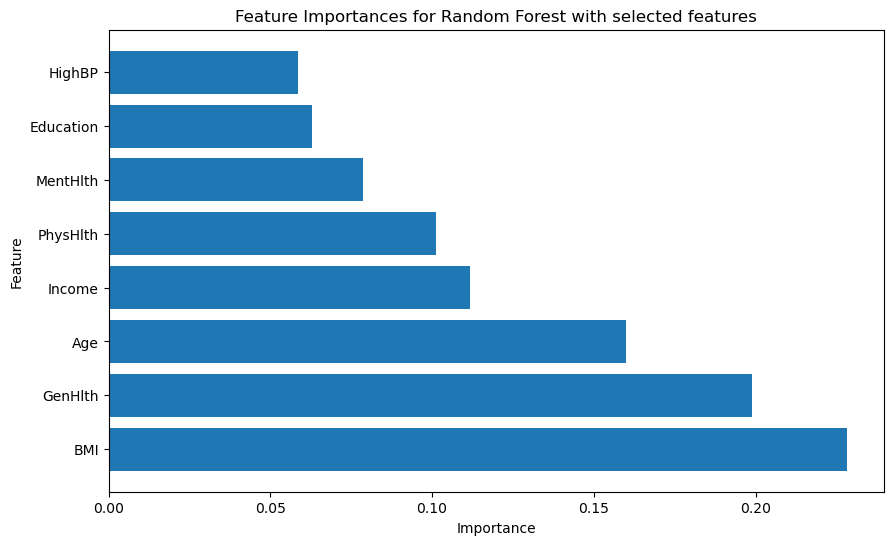

Confusion Matrix for Random Forest with selected features:
              Not Diabetes  Diabetes
Not Diabetes         34820      8826
Diabetes              3469      3621


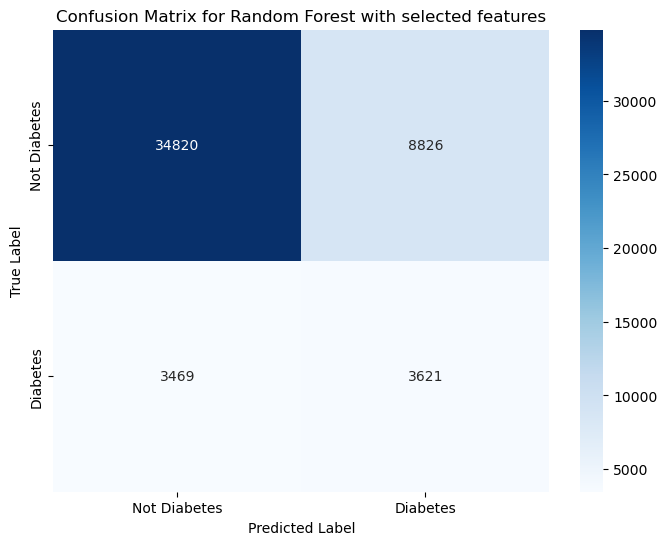

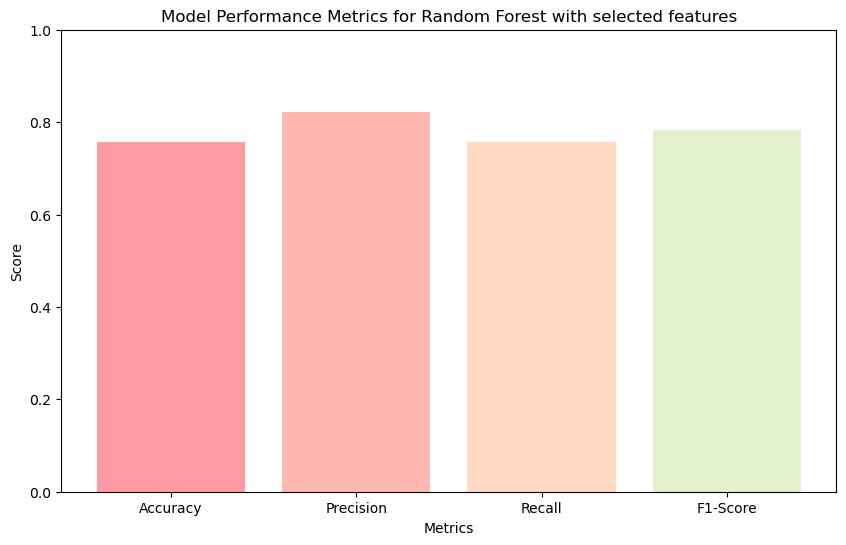

In [261]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#----------------------------------------------------------------------------------------------

# Selected features using Random Forest with resampled data

# Initialize the Random Forest model
rfc_rf_resampled = RandomForestClassifier(n_estimators=100, random_state=55)

# Train the model on the resampled training data with selected features
rfc_rf_resampled.fit(X_train_rf_resampled, Y_train_rf_resampled)

# Predict on the testing data with selected features
Y_pred_rf_resampled_rfc = rfc_rf_resampled.predict(X_test_rf)

# For selected features using Random Forest with resampled data
accuracy_rf_resampled_rfc = accuracy_score(Y_test_rf, Y_pred_rf_resampled_rfc)
precision_rf_resampled_rfc = precision_score(Y_test_rf, Y_pred_rf_resampled_rfc, average='weighted')
recall_rf_resampled_rfc = recall_score(Y_test_rf, Y_pred_rf_resampled_rfc, average='weighted')
f1_rf_resampled_rfc = f1_score(Y_test_rf, Y_pred_rf_resampled_rfc, average='weighted')
confusion_matrix_rf_resampled_rfc = confusion_matrix(Y_test_rf, Y_pred_rf_resampled_rfc)

print("\nFor selected features using Random Forest with resampled data (Random Forest):")
print("Classification Report:")
print(classification_report(Y_test_rf, Y_pred_rf_resampled_rfc))
print("Overall Accuracy:", accuracy_rf_resampled_rfc)
print("Overall Precision:", precision_rf_resampled_rfc)
print("Overall Recall:", recall_rf_resampled_rfc)
print("Overall F1-Score:", f1_rf_resampled_rfc)

# Extract feature importances
feature_importances_rf = rfc_rf_resampled.feature_importances_

# Create a DataFrame to display feature importances
feature_importance_df_rf = pd.DataFrame({'Feature': X_train_rf_resampled.columns, 'Importance': feature_importances_rf})
feature_importance_df_rf = feature_importance_df_rf.sort_values(by='Importance', ascending=False)

print("Feature Importance for Random Forest with selected features:")
print(feature_importance_df_rf)

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df_rf['Feature'], feature_importance_df_rf['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances for Random Forest with selected features')
plt.show()

# Create a DataFrame for the confusion matrix
confusion_df_rf_resampled_rfc = pd.DataFrame(confusion_matrix_rf_resampled_rfc, index=class_labels, columns=class_labels)

# Print confusion matrix
print("Confusion Matrix for Random Forest with selected features:")
print(confusion_df_rf_resampled_rfc)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix_rf_resampled_rfc, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Random Forest with selected features')
plt.show()

# Scores for Random Forest with selected features
scores_rf_resampled_rfc = {
    'Accuracy': accuracy_rf_resampled_rfc,
    'Precision': precision_rf_resampled_rfc,
    'Recall': recall_rf_resampled_rfc,
    'F1-Score': f1_rf_resampled_rfc
}

# Plot scores
plt.figure(figsize=(10, 6))
plt.bar(scores_rf_resampled_rfc.keys(), scores_rf_resampled_rfc.values(), color=['#FF9AA2', '#FFB7B2', '#FFDAC1', '#E2F0CB'])
plt.xlabel('Metrics')
plt.ylabel('Score')
plt.title('Model Performance Metrics for Random Forest with selected features')
plt.ylim(0, 1)  # Limit y-axis to [0, 1] for better visualization of scores
plt.show()



In [314]:
from bokeh.plotting import figure, show
from bokeh.models import HoverTool, ColumnDataSource
import numpy as np

# Example data for demonstration
class_labels = ['Diabetes', 'Not Diabetes']  # Corrected order of class labels
confusion_matrix_rf_resampled_rfc = np.array([[8826, 34820], [3621, 3469]])  # Corrected confusion matrix data

# Bokeh plot for Confusion Matrix
p_confusion_matrix = figure(title="Confusion Matrix for Random Forest with selected features",
                            x_range=class_labels, y_range=class_labels[::-1],  # Reverse order for y-axis
                            toolbar_location=None, tools="", height=400, width=400)

# Transform the data for heatmap
confusion_matrix_image = np.array(confusion_matrix_rf_resampled_rfc)

# Plot the heatmap
for i in range(confusion_matrix_image.shape[0]):
    for j in range(confusion_matrix_image.shape[1]):
        count = confusion_matrix_image[i, j]
        p_confusion_matrix.rect(x=j+0.5, y=i+0.5, width=1, height=1, fill_color='blue', line_color=None)
        p_confusion_matrix.text(x=j+0.5, y=i+0.5, text=str(count),
                                text_align="center", text_baseline="middle",
                                text_color="white", text_font_size="12pt")

# Add labels
p_confusion_matrix.xaxis.axis_label = 'Predicted Label'
p_confusion_matrix.yaxis.axis_label = 'True Label'

show(p_confusion_matrix)


ERROR:bokeh.core.validation.check:E-1001 (BAD_COLUMN_NAME): Glyph refers to nonexistent column name. This could either be due to a misspelling or typo, or due to an expected column being missing. : text='3469' [no close matches] {renderer: GlyphRenderer(id='p55782', ...)}
ERROR:bokeh.core.validation.check:E-1001 (BAD_COLUMN_NAME): Glyph refers to nonexistent column name. This could either be due to a misspelling or typo, or due to an expected column being missing. : text='8826' [no close matches] {renderer: GlyphRenderer(id='p55728', ...)}
ERROR:bokeh.core.validation.check:E-1001 (BAD_COLUMN_NAME): Glyph refers to nonexistent column name. This could either be due to a misspelling or typo, or due to an expected column being missing. : text='34820' [no close matches] {renderer: GlyphRenderer(id='p55746', ...)}
ERROR:bokeh.core.validation.check:E-1001 (BAD_COLUMN_NAME): Glyph refers to nonexistent column name. This could either be due to a misspelling or typo, or due to an expected column

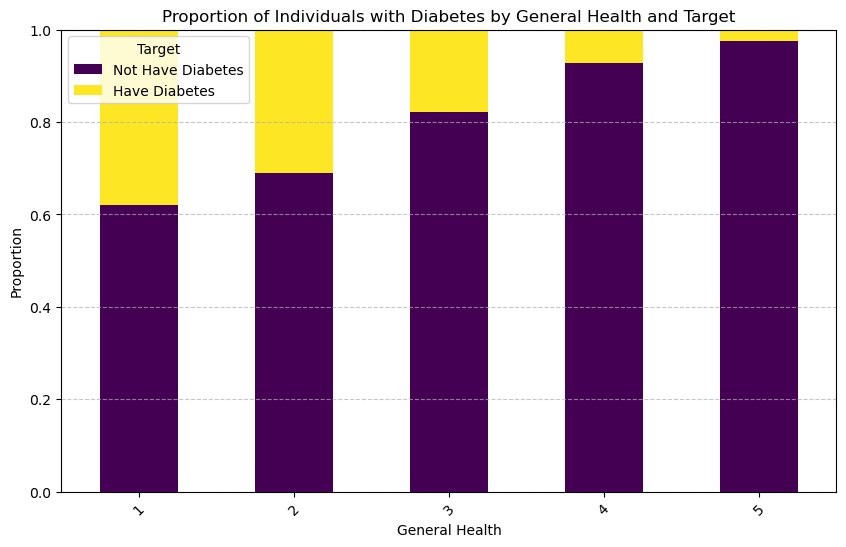

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the order of x-axis categories based on 'General Health' levels
order = d_df['GenHlth'].unique()

# Calculate the proportion of individuals with diabetes for each combination of 'General Health' and target
diabetes_proportion = d_df.groupby(['GenHlth', 'target']).size().unstack(fill_value=0)
diabetes_proportion = diabetes_proportion.div(diabetes_proportion.sum(axis=1), axis=0)

# Plot the trend
plt.figure(figsize=(10, 6))
diabetes_proportion.plot(kind='bar', stacked=True, cmap='viridis', ax=plt.gca())
plt.xlabel('General Health')
plt.ylabel('Proportion')
plt.title('Proportion of Individuals with Diabetes by General Health and Target')
plt.xticks(rotation=45)
plt.legend(title='Target', labels=['Not Have Diabetes', 'Have Diabetes'])
plt.ylim(0, 1)  # Ensure y-axis starts from 0 and ends at 1
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [291]:
from bokeh.plotting import figure, show
from bokeh.models import HoverTool, ColumnDataSource
from bokeh.palettes import Category10
import pandas as pd

# Example data for demonstration
scores = {
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-Score'],
    'Score': [0.758, 0.823, 0.758, 0.783]
}

scores_df = pd.DataFrame(scores)

# Define colors using the Category10 palette
colors = Category10[4]

# Add the 'Color' column to the DataFrame
scores_df['Color'] = colors

# Create ColumnDataSource
source = ColumnDataSource(scores_df)

# Create a figure for model performance metrics
p_score = figure(x_range=scores_df['Metric'], height=400, width=500, title="Model Performance Metrics",
                 toolbar_location=None, tools="")

# Plot the vertical bars with colors referenced from the data source
p_score.vbar(x='Metric', top='Score', width=0.9, source=source, 
             fill_color='Color', line_color='white', fill_alpha=0.8, line_alpha=0.8)

# Add hover tooltips
hover = HoverTool()
hover.tooltips = [("Metric", "@Metric"), ("Score", "@Score")]
p_score.add_tools(hover)

# Add labels and formatting to the model performance metrics plot
p_score.xaxis.major_label_orientation = 1.2
p_score.xgrid.grid_line_color = None
p_score.y_range.start = 0
p_score.yaxis.axis_label = "Score"
p_score.xaxis.axis_label = "Metric"

# Show the plot
show(p_score)


In [326]:
from bokeh.plotting import figure, show
from bokeh.models import ColumnDataSource, HoverTool
from bokeh.layouts import column
import pandas as pd
from bokeh.palettes import Category10
import numpy as np

# Assuming you have the feature importance DataFrame
feature_importance_data = {
    'Feature': ['BMI', 'GenHlth', 'Age', 'Income', 'PhysHlth', 'MentHlth', 'Education', 'HighBP'],
    'Importance': [0.228, 0.198, 0.159, 0.111, 0.101, 0.078, 0.062, 0.058]
}
feature_importance_df = pd.DataFrame(feature_importance_data)

# Assign a color palette to each feature
colors = Category10[8]

# Round off importance values to three decimals
feature_importance_df['Importance'] = feature_importance_df['Importance']

# Create a new column for colors in the DataFrame
feature_importance_df['Color'] = colors

# Create ColumnDataSource
source = ColumnDataSource(feature_importance_df)

# Create a figure for feature importance
p_importance = figure(x_range=feature_importance_df['Feature'], height=400, width=500, title="Random Forest Model Features and Target Results\n\nFeature Importance",
                      toolbar_location=None, tools="")
p_importance.vbar(x='Feature', top='Importance', width=0.9, source=source, 
                  fill_color='Color', line_color='white', fill_alpha=0.8, line_alpha=0.8)

# Add hover tooltips
hover = HoverTool()
hover.tooltips = [("Feature", "@Feature"), ("Importance", "@Importance")]
p_importance.add_tools(hover)

# Add labels and formatting to the feature importance plot
p_importance.xaxis.major_label_orientation = 1.2
p_importance.xgrid.grid_line_color = None
p_importance.y_range.start = 0
p_importance.yaxis.axis_label = "Importance"
p_importance.xaxis.axis_label = "Feature"


# Example data for demonstration
scores = {
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-Score'],
    'Score': [0.758, 0.823, 0.758, 0.783]
}

scores_df = pd.DataFrame(scores)

# Define colors using the Category10 palette
colors = Category10[4]

# Add the 'Color' column to the DataFrame
scores_df['Color'] = colors

# Create ColumnDataSource
source = ColumnDataSource(scores_df)

# Create a figure for model performance metrics
p_score = figure(x_range=scores_df['Metric'], height=400, width=500, title="Model Performance Metrics",
                 toolbar_location=None, tools="")

# Plot the vertical bars with colors referenced from the data source
p_score.vbar(x='Metric', top='Score', width=0.9, source=source, 
             fill_color='Color', line_color='white', fill_alpha=0.8, line_alpha=0.8)

# Add hover tooltips
hover = HoverTool()
hover.tooltips = [("Metric", "@Metric"), ("Score", "@Score")]
p_score.add_tools(hover)

# Add labels and formatting to the model performance metrics plot
p_score.xaxis.major_label_orientation = 1.2
p_score.xgrid.grid_line_color = None
p_score.y_range.start = 0
p_score.yaxis.axis_label = "Score"
p_score.xaxis.axis_label = "Metric"

# Define the list of features
features = ['BMI', 'Age', 'Income', 'PhysHlth', 'MentHlth', 'Education', 'HighBP', 'GenHlth']

# Create a list to store all the plots
plots = []

def plot_feature(feature):
    if feature == 'BMI':
        # Group data by 'target' column
        group_0 = d_df[d_df['target'] == 0][feature]
        group_1 = d_df[d_df['target'] == 1][feature]

        # Create histogram for target 0
        hist_0, edges_0 = np.histogram(group_0, bins=20)
        p_hist = figure(title=f"{feature} Distribution", background_fill_color="#fafafa", height=100, width=200)
        p_hist.quad(top=hist_0, bottom=0, left=edges_0[:-1], right=edges_0[1:], fill_color="navy", line_color="white", alpha=0.5)

        # Create histogram for target 1
        hist_1, edges_1 = np.histogram(group_1, bins=20)
        p_hist.quad(top=hist_1, bottom=0, left=edges_1[:-1], right=edges_1[1:], fill_color="red", line_color="white", alpha=0.5)

        # Add hover tooltips
        hover = HoverTool()
        hover.tooltips = [("Count", "@top")]
        p_hist.add_tools(hover)

        # Set labels and axis
        p_hist.xaxis.axis_label = feature
        p_hist.yaxis.axis_label = 'Frequency'

        return p_hist

    else:
        p = figure(x_range=sorted(map(str, d_df[feature].unique()), key=lambda x: int(x)), height=100, width=200,
                   title=f'Proportion of Individuals with Diabetes by {feature}',
                   toolbar_location=None, tools="")
        
        # Calculate the proportion of individuals with diabetes for each category of the feature
        diabetes_proportion = d_df.groupby([feature, 'target']).size().unstack(fill_value=0)
        diabetes_proportion = diabetes_proportion.div(diabetes_proportion.sum(axis=1), axis=0)

        # Reset the index to convert hierarchical index to columns
        diabetes_proportion.reset_index(inplace=True)

        # Convert DataFrame to ColumnDataSource
        data = {
            'categories': list(map(str, diabetes_proportion[feature])),
            'Not Have Diabetes': list(diabetes_proportion[0]),
            'Have Diabetes': list(diabetes_proportion[1])
        }
        source = ColumnDataSource(data=data)

        # Plot stacked bars
        p.vbar_stack(stackers=['Not Have Diabetes', 'Have Diabetes'], x='categories', width=0.9,
                     color=["#1f77b4", "#ff7f0e"], source=source,
                     legend_label=['Not Have Diabetes', 'Have Diabetes'])

        # Add hover tooltips
        hover = HoverTool()
        hover.tooltips = [('Proportion', '@$name')]
        p.add_tools(hover)

        # Set plot properties
        p.xaxis.axis_label = feature
        p.yaxis.axis_label = 'Proportion'
        p.legend.title = 'Diabetes Status'
        p.legend.location = 'bottom_right'
        p.legend.orientation = 'horizontal'
        p.legend.label_text_font_size = '8pt'  # Set the font size of legend labels
        p.legend.spacing = 1
        return p

# Increase the title size for each plot
p_importance.title.text_font_size = '18pt'  # Feature Importance plot title size
p_score.title.text_font_size = '16pt'
from bokeh.layouts import gridplot

# Create plots for each feature and add them to the list
plots = [p_importance, p_score]  # Start with the feature importance plot
for feature in features:
    p = plot_feature(feature)
    p.title.text_font_size = '16pt'  # Increase title size for other plots
    plots.append(p)

# Create a grid layout with two plots in each row
plots_grid = [plots[i:i+2] for i in range(0, len(plots), 2)]

# Combine the feature importance plot and individual feature plots into one grid
grid = gridplot(plots_grid, sizing_mode='scale_width')

# Show the grid layout
show(grid)


In [216]:
'''from bokeh.plotting import figure, show
from bokeh.models import ColumnDataSource, HoverTool
from bokeh.layouts import gridplot
from itertools import cycle
import pandas as pd
from bokeh.palettes import Category10
import numpy as np

# Assuming you have the feature importance DataFrame
feature_importance_data = {
    'Feature': ['BMI', 'GenHlth', 'Age', 'Income', 'PhysHlth', 'MentHlth', 'Education', 'HighBP'],
    'Importance': [0.228096, 0.198901, 0.159836, 0.111624, 0.101331, 0.078566, 0.062965, 0.058681]
}
feature_importance_df = pd.DataFrame(feature_importance_data)

# Assign a color palette to each feature
colors = Category10[8]

# Round off importance values to three decimals
feature_importance_df['Importance'] = feature_importance_df['Importance'].round(3)

# Create a new column for colors in the DataFrame
feature_importance_df['Color'] = colors

# Create ColumnDataSource
source = ColumnDataSource(feature_importance_df)

# Create a figure for feature importance
p_importance = figure(x_range=feature_importance_df['Feature'], height=350, title="Feature Importance",
                      toolbar_location=None, tools="")
p_importance.vbar(x='Feature', top='Importance', width=0.9, source=source, 
                  fill_color='Color', line_color='white', fill_alpha=0.8, line_alpha=0.8)

# Add hover tooltips
hover = HoverTool()
hover.tooltips = [("Feature", "@Feature"), ("Importance", "@Importance")]
p_importance.add_tools(hover)

# Add labels and formatting to the feature importance plot
p_importance.xaxis.major_label_orientation = 1.2
p_importance.xgrid.grid_line_color = None
p_importance.y_range.start = 0
p_importance.yaxis.axis_label = "Importance"
p_importance.xaxis.axis_label = "Feature"

# Define the list of features
features = ['BMI', 'Age', 'Income', 'PhysHlth', 'MentHlth', 'Education', 'HighBP', 'GenHlth']

# Create a list to store all the plots
plots = []

def plot_feature(feature):
    if feature == 'BMI':
        p_hist = figure(title=f"{feature} Distribution", background_fill_color="#fafafa")
        hist, edges = np.histogram(d_df[feature], bins=20)
        p_hist.quad(top=hist, bottom=0, left=edges[:-1], right=edges[1:], fill_color="navy", line_color="white", alpha=0.5)
        p_hist.xaxis.axis_label = feature
        p_hist.yaxis.axis_label = 'Frequency'
        return p_hist
    else:
        p = figure(x_range=sorted(map(str, d_df[feature].unique()), key=lambda x: int(x)), height=300, width=300,
                   title=f'Proportion of Individuals with Diabetes by {feature}',
                   toolbar_location=None, tools="")
        
        # Calculate the proportion of individuals with diabetes for each category of the feature
        diabetes_proportion = d_df.groupby([feature, 'target']).size().unstack(fill_value=0)
        diabetes_proportion = diabetes_proportion.div(diabetes_proportion.sum(axis=1), axis=0)

        # Reset the index to convert hierarchical index to columns
        diabetes_proportion.reset_index(inplace=True)

        # Convert DataFrame to ColumnDataSource
        data = {
            'categories': list(map(str, diabetes_proportion[feature])),
            'Not Have Diabetes': list(diabetes_proportion[0]),
            'Have Diabetes': list(diabetes_proportion[1])
        }
        source = ColumnDataSource(data=data)

        # Plot stacked bars
        colors = cycle(["#1f77b4", "#ff7f0e"])  # Cycle through different colors for bars
        p.vbar_stack(stackers=['Not Have Diabetes', 'Have Diabetes'], x='categories', width=0.9,
                     color=[next(colors), next(colors)], source=source,
                     legend_label=['Not Have Diabetes', 'Have Diabetes'])

        # Add hover tooltips
        hover = HoverTool()
        hover.tooltips = [('Proportion', '@$name')]
        p.add_tools(hover)

        # Set plot properties
        p.xaxis.axis_label = feature
        p.yaxis.axis_label = 'Proportion'
        p.legend.title = 'Diabetes Status'
        p.legend.location = 'bottom_right'
        p.legend.orientation = 'horizontal'
        p.legend.label_text_font_size = '6pt'  # Set the font size of legend labels
        p.legend.spacing = 1
        return p

# Create plots for each feature and add them to the list
for feature in features:
    plots.append(plot_feature(feature))

# Reshape the plots list into a 2x5 matrix
plots_matrix = [plots[i:i+5] for i in range(0, len(plots), 5)]

# Combine the feature importance plot and individual feature plots into one grid
grid = gridplot(plots_matrix, sizing_mode='stretch_both')

# Show the grid layout
show(grid)'''

In [134]:
'''from bokeh.plotting import figure, show
from bokeh.models import ColumnDataSource, HoverTool
from bokeh.palettes import Category10
import pandas as pd

# Assuming you have the feature importance DataFrame
feature_importance_data = {
    'Feature': ['BMI', 'GenHlth', 'Age', 'Income', 'PhysHlth', 'MentHlth', 'Education', 'HighBP'],
    'Importance': [0.228096, 0.198901, 0.159836, 0.111624, 0.101331, 0.078566, 0.062965, 0.058681]
}
feature_importance_df = pd.DataFrame(feature_importance_data)

# Assign a color palette to each feature
colors = Category10[8]

# Round off importance values to three decimals
feature_importance_df['Importance'] = feature_importance_df['Importance'].round(3)

# Create a new column for colors in the DataFrame
feature_importance_df['Color'] = colors

# Create ColumnDataSource
source = ColumnDataSource(feature_importance_df)

# Create a figure with title
p = figure(x_range=feature_importance_df['Feature'], height=350, title="Feature Importance of factors affecting The Target using Random Forest Algo",
           toolbar_location=None, tools="")

# Plot vertical bars for feature importance with different colors
p.vbar(x='Feature', top='Importance', width=0.9, source=source, 
       fill_color='Color', line_color='white', fill_alpha=0.8, line_alpha=0.8)

# Add hover tooltips
hover = HoverTool()
hover.tooltips = [("Feature", "@Feature"), ("Importance", "@Importance")]
p.add_tools(hover)

# Add labels and formatting
p.xaxis.major_label_orientation = 1.2
p.xgrid.grid_line_color = None
p.y_range.start = 0
p.yaxis.axis_label = "Importance"
p.xaxis.axis_label = "Feature"

# Show the plot
show(p)'''


In [217]:
'''from bokeh.plotting import figure, show
from bokeh.models import ColumnDataSource, HoverTool
from bokeh.layouts import gridplot
from bokeh.palettes import Category10
import pandas as pd
import numpy as np

# Assuming you have the feature importance DataFrame
feature_importance_data = {
    'Feature': ['BMI', 'GenHlth', 'Age', 'Income', 'PhysHlth', 'MentHlth', 'Education', 'HighBP'],
    'Importance': [0.228096, 0.198901, 0.159836, 0.111624, 0.101331, 0.078566, 0.062965, 0.058681]
}
feature_importance_df = pd.DataFrame(feature_importance_data)

# Create the histograms for all features
hist_plots = []
for feature in feature_importance_df['Feature']:
    p_hist = figure(title=f"{feature} Distribution", background_fill_color="#fafafa")
    hist, edges = np.histogram(d_df[feature], bins=20)
    p_hist.quad(top=hist, bottom=0, left=edges[:-1], right=edges[1:], fill_color="navy", line_color="white", alpha=0.5)
    p_hist.xaxis.axis_label = feature
    p_hist.yaxis.axis_label = 'Frequency'
    hist_plots.append(p_hist)

# Assign a color palette to each feature for the feature importance plot
colors = Category10[8]
feature_importance_df['Color'] = colors

# Create ColumnDataSource for feature importance plot
source = ColumnDataSource(feature_importance_df)

# Create the feature importance plot
p_importance = figure(x_range=feature_importance_df['Feature'], height=350, title="Feature Importance",
                      toolbar_location=None, tools="")
p_importance.vbar(x='Feature', top='Importance', width=0.9, source=source, fill_color='Color',
                  line_color='white', fill_alpha=0.8, line_alpha=0.8)
p_importance.add_tools(HoverTool(tooltips=[("Feature", "@Feature"), ("Importance", "@Importance")]))
p_importance.xaxis.major_label_orientation = 1.2
p_importance.xgrid.grid_line_color = None
p_importance.y_range.start = 0
p_importance.yaxis.axis_label = "Importance"
p_importance.xaxis.axis_label = "Feature"

# Arrange plots in a grid layout
hist_plots.insert(0, p_importance)  # Insert the feature importance plot at the beginning
grid = gridplot([[plot for plot in hist_plots]], sizing_mode='stretch_width')

# Show the grid layout
show(grid)
'''

'from bokeh.plotting import figure, show\nfrom bokeh.models import ColumnDataSource, HoverTool\nfrom bokeh.layouts import gridplot\nfrom bokeh.palettes import Category10\nimport pandas as pd\nimport numpy as np\n\n# Assuming you have the feature importance DataFrame\nfeature_importance_data = {\n    \'Feature\': [\'BMI\', \'GenHlth\', \'Age\', \'Income\', \'PhysHlth\', \'MentHlth\', \'Education\', \'HighBP\'],\n    \'Importance\': [0.228096, 0.198901, 0.159836, 0.111624, 0.101331, 0.078566, 0.062965, 0.058681]\n}\nfeature_importance_df = pd.DataFrame(feature_importance_data)\n\n# Create the histograms for all features\nhist_plots = []\nfor feature in feature_importance_df[\'Feature\']:\n    p_hist = figure(title=f"{feature} Distribution", background_fill_color="#fafafa")\n    hist, edges = np.histogram(d_df[feature], bins=20)\n    p_hist.quad(top=hist, bottom=0, left=edges[:-1], right=edges[1:], fill_color="navy", line_color="white", alpha=0.5)\n    p_hist.xaxis.axis_label = feature\n 

In [33]:
# Create new variables for resampled datasets
X_train_resampled_new = X_train_resampled.copy()
X_test_new = X_test.copy()
X_train_rf_resampled_new = X_train_rf_resampled.copy()
X_test_rf_new = X_test_rf.copy()
X_train_lv_resampled_new = X_train_lv_resampled.copy()
X_test_lv_new = X_test_lv.copy()

# List of categorical columns
categorical_columns = ['GenHlth', 'MentHlth', 'PhysHlth', 'Age', 'Education', 'Income']

# Convert categorical variables to numerical using one-hot encoding
for col in categorical_columns:
    X_train_resampled_new[col] = X_train_resampled_new[col].astype(float)
    X_test_new[col] = X_test_new[col].astype(float)
    X_train_rf_resampled_new[col] = X_train_rf_resampled_new[col].astype(float)
    X_test_rf_new[col] = X_test_rf_new[col].astype(float)
    X_train_lv_resampled_new[col] = X_train_lv_resampled_new[col].astype(float)
    X_test_lv_new[col] = X_test_lv_new[col].astype(float)

# Now you can proceed with training your models using these new variables


In [35]:
# Gradient Boosting

#!pip install xgboost
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import pandas as pd

#----------------------------------------------------------------------------------------------

# All features using resampled data

# Initialize the XGBoost model
xgb_all_resampled_new = XGBClassifier(random_state=55)

# Train the model on the resampled training data
xgb_all_resampled_new.fit(X_train_resampled_new, Y_train_resampled)

# Predict on the testing data
Y_pred_all_resampled_xgb_new = xgb_all_resampled_new.predict(X_test_new)

# For all features using resampled data
accuracy_all_resampled_xgb_new = accuracy_score(Y_test, Y_pred_all_resampled_xgb_new)
precision_all_resampled_xgb_new = precision_score(Y_test, Y_pred_all_resampled_xgb_new, average='weighted')
recall_all_resampled_xgb_new = recall_score(Y_test, Y_pred_all_resampled_xgb_new, average='weighted')
f1_all_resampled_xgb_new = f1_score(Y_test, Y_pred_all_resampled_xgb_new, average='weighted')
confusion_matrix_all_resampled_xgb_new = confusion_matrix(Y_test, Y_pred_all_resampled_xgb_new)

print("For all features using resampled data (XGBoost with new variables):")
print("Classification Report:")
print(classification_report(Y_test, Y_pred_all_resampled_xgb_new))
print("Overall Accuracy:", accuracy_all_resampled_xgb_new)
print("Overall Precision:", precision_all_resampled_xgb_new)
print("Overall Recall:", recall_all_resampled_xgb_new)
print("Overall F1-Score:", f1_all_resampled_xgb_new)

# Define index and columns labels
class_labels = ['Class 0', 'Class 1']  # Update with your actual class labels

# Create a DataFrame for the confusion matrix
confusion_df_all_resampled_xgb_new = pd.DataFrame(confusion_matrix_all_resampled_xgb_new, index=class_labels, columns=class_labels)

# Print confusion matrix
print("Confusion Matrix:")
print(confusion_df_all_resampled_xgb_new)

#----------------------------------------------------------------------------------------------

# Selected features using Random Forest with resampled data

# Initialize the XGBoost model
xgb_rf_resampled_new = XGBClassifier(random_state=55)

# Train the model on the resampled training data with selected features
xgb_rf_resampled_new.fit(X_train_rf_resampled_new, Y_train_rf_resampled)

# Predict on the testing data with selected features
Y_pred_rf_resampled_xgb_new = xgb_rf_resampled_new.predict(X_test_rf_new)

# For selected features using Random Forest with resampled data
accuracy_rf_resampled_xgb_new = accuracy_score(Y_test_rf, Y_pred_rf_resampled_xgb_new)
precision_rf_resampled_xgb_new = precision_score(Y_test_rf, Y_pred_rf_resampled_xgb_new, average='weighted')
recall_rf_resampled_xgb_new = recall_score(Y_test_rf, Y_pred_rf_resampled_xgb_new, average='weighted')
f1_rf_resampled_xgb_new = f1_score(Y_test_rf, Y_pred_rf_resampled_xgb_new, average='weighted')
confusion_matrix_rf_resampled_xgb_new = confusion_matrix(Y_test_rf, Y_pred_rf_resampled_xgb_new)

# Print metrics for selected features using Random Forest with resampled data
print("\nFor selected features using Random Forest with resampled data (XGBoost):")
print("Classification Report:")
print(classification_report(Y_test_rf, Y_pred_rf_resampled_xgb_new))
print("Overall Accuracy:", accuracy_rf_resampled_xgb_new)
print("Overall Precision:", precision_rf_resampled_xgb_new)
print("Overall Recall:", recall_rf_resampled_xgb_new)
print("Overall F1-Score:", f1_rf_resampled_xgb_new)
print("Confusion Matrix:")
print(pd.DataFrame(confusion_matrix_rf_resampled_xgb_new, index=class_labels, columns=class_labels))

#----------------------------------------------------------------------------------------------

# Selected features using low variance with resampled data

# Initialize the XGBoost model
xgb_lv_resampled_new = XGBClassifier(random_state=55)

# Train the model on the resampled training data with selected features
xgb_lv_resampled_new.fit(X_train_lv_resampled_new, Y_train_lv_resampled)

# Predict on the testing data with selected features
Y_pred_lv_resampled_xgb_new = xgb_lv_resampled_new.predict(X_test_lv_new)

# For selected features using low variance with resampled data
accuracy_lv_resampled_xgb_new = accuracy_score(Y_test_lv, Y_pred_lv_resampled_xgb_new)
precision_lv_resampled_xgb_new = precision_score(Y_test_lv, Y_pred_lv_resampled_xgb_new, average='weighted')
recall_lv_resampled_xgb_new = recall_score(Y_test_lv, Y_pred_lv_resampled_xgb_new, average='weighted')
f1_lv_resampled_xgb_new = f1_score(Y_test_lv, Y_pred_lv_resampled_xgb_new, average='weighted')
confusion_matrix_lv_resampled_xgb_new = confusion_matrix(Y_test_lv, Y_pred_lv_resampled_xgb_new)

# Print metrics for selected features using low variance with resampled data
print("\nFor selected features using low variance with resampled data (XGBoost):")
print("Classification Report:")
print(classification_report(Y_test_lv, Y_pred_lv_resampled_xgb_new))
print("Overall Accuracy:", accuracy_lv_resampled_xgb_new)
print("Overall Precision:", precision_lv_resampled_xgb_new)
print("Overall Recall:", recall_lv_resampled_xgb_new)
print("Overall F1-Score:", f1_lv_resampled_xgb_new)
print("Confusion Matrix:")
print(pd.DataFrame(confusion_matrix_lv_resampled_xgb_new, index=class_labels, columns=class_labels))


For all features using resampled data (XGBoost with new variables):
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.76      0.84     43646
           1       0.30      0.64      0.41      7090

    accuracy                           0.75     50736
   macro avg       0.62      0.70      0.63     50736
weighted avg       0.84      0.75      0.78     50736

Overall Accuracy: 0.7459003468937244
Overall Precision: 0.8412203547740622
Overall Recall: 0.7459003468937244
Overall F1-Score: 0.7784245612421447
Confusion Matrix:
         Class 0  Class 1
Class 0    33324    10322
Class 1     2570     4520

For selected features using Random Forest with resampled data (XGBoost):
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.73      0.82     43646
           1       0.30      0.72      0.42      7090

    accuracy                           0.72     50736
   macro avg       0.62 

In [36]:
# Best model of the above three XGBoost models

# Comparing models based on evaluation metrics

# Create a dictionary to store evaluation metrics for each model
models_evaluation_xgb = {
    'all_features_xgb': {'accuracy': accuracy_all_resampled_xgb_new, 'precision': precision_all_resampled_xgb_new, 
                         'recall': recall_all_resampled_xgb_new, 'f1_score': f1_all_resampled_xgb_new},
    'selected_features_rf_xgb': {'accuracy': accuracy_rf_resampled_xgb_new, 'precision': precision_rf_resampled_xgb_new, 
                                 'recall': recall_rf_resampled_xgb_new, 'f1_score': f1_rf_resampled_xgb_new},
    'selected_features_lv_xgb': {'accuracy': accuracy_lv_resampled_xgb_new, 'precision': precision_lv_resampled_xgb_new, 
                                 'recall': recall_lv_resampled_xgb_new, 'f1_score': f1_lv_resampled_xgb_new}
}

# Print evaluation metrics for each model
for model, metrics in models_evaluation_xgb.items():
    print(f"\nEvaluation metrics for {model}:")
    print("Accuracy:", metrics['accuracy'])
    print("Precision:", metrics['precision'])
    print("Recall:", metrics['recall'])
    print("F1 Score:", metrics['f1_score'])

# Assign weights to evaluation metrics (you can adjust these weights based on your preference)
weights = {'accuracy': 1, 'precision': 1, 'recall': 1, 'f1_score': 1}

# Calculate weighted sums for each model
weighted_sums_xgb = {}
for model, metrics in models_evaluation_xgb.items():
    weighted_sum_xgb = sum(metrics[metric] * weights[metric] for metric in metrics)
    weighted_sums_xgb[model] = weighted_sum_xgb

# Rank the models based on their weighted sums (higher sum is better)
ranked_models_xgb = sorted(weighted_sums_xgb, key=weighted_sums_xgb.get, reverse=True)

# Print the ranked models
print("\nRanked models based on overall performance:")
for i, model in enumerate(ranked_models_xgb, start=1):
    print(f"{i}. {model} (Weighted Sum: {weighted_sums_xgb[model]})")



Evaluation metrics for all_features_xgb:
Accuracy: 0.7459003468937244
Precision: 0.8412203547740622
Recall: 0.7459003468937244
F1 Score: 0.7784245612421447

Evaluation metrics for selected_features_rf_xgb:
Accuracy: 0.7245939766635131
Precision: 0.8513910226404653
Recall: 0.7245939766635131
F1 Score: 0.7637470438578648

Evaluation metrics for selected_features_lv_xgb:
Accuracy: 0.739120151371807
Precision: 0.8433395087234508
Recall: 0.739120151371807
F1 Score: 0.7737494449785127

Ranked models based on overall performance:
1. all_features_xgb (Weighted Sum: 3.1114456098036554)
2. selected_features_lv_xgb (Weighted Sum: 3.095329256445577)
3. selected_features_rf_xgb (Weighted Sum: 3.0643260198253564)


In [43]:
!pip install --upgrade bokeh


In [49]:
pip install --upgrade bokeh


Note: you may need to restart the kernel to use updated packages.


In [226]:
# T test and ANOVA

from scipy.stats import ttest_ind, f_oneway

# T-tests
t_stat, p_value = ttest_ind(d_df[d_df['HighBP'] == 1]['target'], d_df[d_df['HighBP'] == 0]['target'])

# Print T-statistic summary
print("T-test Summary:")
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")
if p_value < 0.05:
    print("There is a statistically significant difference in the mean values of the target variable (diabetes) between the groups with high blood pressure and without high blood pressure.")
else:
    print("There is no statistically significant difference in the mean values of the target variable (diabetes) between the groups with high blood pressure and without high blood pressure.")


T-test Summary:
T-statistic: 137.36945008253264
P-value: 0.0
There is a statistically significant difference in the mean values of the target variable (diabetes) between the groups with high blood pressure and without high blood pressure.


In [227]:
# T-test for BMI
t_stat_bmi, p_value_bmi = ttest_ind(d_df[d_df['BMI'] >= 25]['target'], d_df[d_df['BMI'] < 25]['target'])

# Print T-statistic summary for BMI
print("T-test Summary for BMI:")
print(f"T-statistic: {t_stat_bmi}")
print(f"P-value: {p_value_bmi}")
if p_value_bmi < 0.05:
    print("There is a statistically significant difference in the mean values of the target variable (diabetes) between individuals with BMI greater than or equal to 25 and those with BMI less than 25.")
else:
    print("There is no statistically significant difference in the mean values of the target variable (diabetes) between individuals with BMI greater than or equal to 25 and those with BMI less than 25.")


T-test Summary for BMI:
T-statistic: 76.45615149870669
P-value: 0.0
There is a statistically significant difference in the mean values of the target variable (diabetes) between individuals with BMI greater than or equal to 25 and those with BMI less than 25.


In [228]:
from scipy.stats import f_oneway

# Define a function to perform ANOVA and print the summary
def perform_anova(variable_name):
    groups = [group['target'] for name, group in d_df.groupby(variable_name)]
    f_stat, p_value_anova = f_oneway(*groups)
    print(f"ANOVA Summary for {variable_name}:")
    print(f"F-statistic: {f_stat}")
    print(f"P-value: {p_value_anova}")
    if p_value_anova < 0.05:
        print(f"There is a statistically significant difference in the mean values of the target variable (diabetes) across different levels of {variable_name}.")
    else:
        print(f"There is no statistically significant difference in the mean values of the target variable (diabetes) across different levels of {variable_name}.")

# Perform ANOVA for each categorical variable
categorical_variables = ['GenHlth', 'Age', 'Income', 'PhysHlth', 'MentHlth', 'Education']
for var in categorical_variables:
    perform_anova(var)


ANOVA Summary for GenHlth:
F-statistic: 6241.063772429136
P-value: 0.0
There is a statistically significant difference in the mean values of the target variable (diabetes) across different levels of GenHlth.
ANOVA Summary for Age:
F-statistic: 759.2048529966244
P-value: 0.0
There is a statistically significant difference in the mean values of the target variable (diabetes) across different levels of Age.
ANOVA Summary for Income:
F-statistic: 1028.90567990658
P-value: 0.0
There is a statistically significant difference in the mean values of the target variable (diabetes) across different levels of Income.
ANOVA Summary for PhysHlth:
F-statistic: 278.1077866068911
P-value: 0.0
There is a statistically significant difference in the mean values of the target variable (diabetes) across different levels of PhysHlth.
ANOVA Summary for MentHlth:
F-statistic: 48.67589319600014
P-value: 8.616318208162025e-288
There is a statistically significant difference in the mean values of the target varia

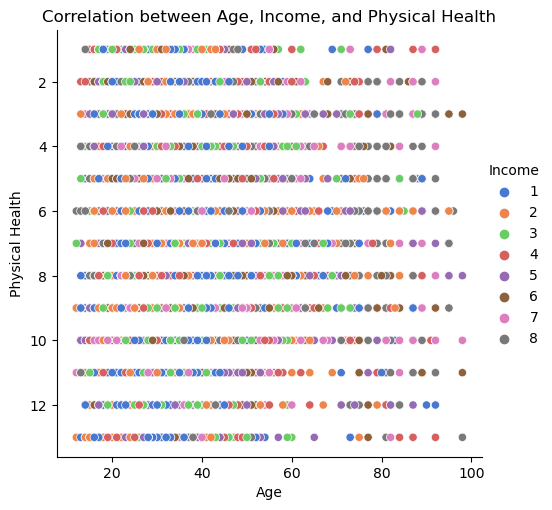

In [238]:
sns.relplot(x="BMI", y="Age", hue="Income", palette="muted", data=d_df)
plt.xlabel("Age")
plt.ylabel("Physical Health")
plt.title("Correlation between Age, Income, and Physical Health")
plt.show()
